In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
sys.path.insert(0, '/Users/Corey4005/Desktop/repos/SCANAnalysis/SCAN-scripts/') #my windows
#sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')#for my Macbook 
#sys.path.insert(0, '/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')#for my Linux Machine

In [2]:
from class_driver import Driver
from datasets import SCAN_READ, SOILS_READ, LANDCOVER_READ, SM_VS_ESI_ANOM_READ  #daily soil moisture data for all scan sites
SCAN_READ

Date       station  SMN-2.0in  SMN-4.0in  SMN-8.0in  SMN-20.0in  \
0       4/24/02  2057:AL:SCAN       14.2       11.9       15.9         NaN   
1       4/25/02  2057:AL:SCAN       13.5       11.6       15.4         NaN   
2       4/26/02  2057:AL:SCAN       13.1       11.3       15.3        33.7   
3       4/27/02  2057:AL:SCAN       13.1       11.4       15.0         NaN   
4       4/28/02  2057:AL:SCAN       13.3       11.3       14.4         NaN   
...         ...           ...        ...        ...        ...         ...   
79218  10/12/19  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79219   3/28/20  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79220   5/31/20  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79221   9/21/19  2176:AL:SCAN        NaN        NaN        NaN         NaN   
79222   1/14/09  2056:AL:SCAN        NaN        NaN        NaN         NaN   

       SMN-40.0in  SMS-2.0in  SMS-4.0in  SMS-8.0in  ...  STV-2.0in  STV-4.0in  \
0            34.9       14.7       12.7       16.6  ...     68.660     68.150   
1            34.8       14.5       11.8       16.0  ...     66.552     67.168   
2            34.6       13.5       11.6       15.4  ...     58.370     59.870   
3            34.5       13.2       11.5       15.5  ...     62.510     62.232   
4            34.4       13.5       11.5       15.0  ...     68.180     67.408   
...           ...        ...        ...        ...  ...        ...        ...   
79218         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79219         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79220         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79221         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79222         NaN        NaN        NaN        NaN  ...        NaN        NaN   

       STV-8.0in  STV-20.0in  STV-40.0in  STX-2.0in  STX-4.0in  STX-8.0in  \
0         65.705      63.988      60.980      76.10      73.58      67.64   
1         66.102      64.302      61.032      70.88      70.16      67.46   
2         62.142      63.575      61.160      60.26      62.78      65.30   
3         61.025      62.008      61.018      69.80      67.64      63.32   
4         64.198      62.308      60.740      73.22      71.24      66.20   
...          ...         ...         ...        ...        ...        ...   
79218        NaN         NaN         NaN        NaN        NaN        NaN   
79219        NaN         NaN         NaN        NaN        NaN        NaN   
79220        NaN         NaN         NaN        NaN        NaN        NaN   
79221        NaN         NaN         NaN        NaN        NaN        NaN   
79222        NaN         NaN         NaN        NaN        NaN        NaN   

       STX-20.0in  STX-40.0in  
0           64.22       60.98  
1           64.40       61.16  
2           64.22       61.16  
3           62.60       61.16  
4           62.78       60.80  
...           ...         ...  
79218         NaN         NaN  
79219         NaN         NaN  
79220         NaN         NaN  
79221         NaN         NaN  
79222         NaN         NaN  

[79223 rows x 42 columns]

In [3]:
#instantiate a driver object with data
obj = Driver(SCAN_READ)

#calculate the soil moisture mean by month dataframe
obj.mean_soil_moisture_by_month()

#get the standard deviation by month dataframe
obj.standard_deviation_by_month()

#create a column for months in the stations dataframe
obj.get_month_from_dates()

#merge stdev, mean and stations dataframe together
obj.merge_station_stdev_mean()

#calculate the z_scores for each of the observations in the merged dataframe
obj.z_score()

#calculate the data quality based on z_score
obj.quality_z_score(std=3.5)

#clean the data and remove data that is outside the 3.5 standard deviation limit
obj.clean_data()

#resample the SMS data and return 1w and store in resample class
obj.soil_moisture_one_week_resample()

#append the soils to SMS dataframes
obj.create_1w_soil_columns()

#merge with ALEXI
obj.merge_1w_soil_resample_with_ALEXI()



Calculating Monthly Mean for 2057:AL:SCAN
Calculating Monthly Mean for 2078:AL:SCAN
Calculating Monthly Mean for 2177:AL:SCAN
Calculating Monthly Mean for 2113:AL:SCAN
Calculating Monthly Mean for 2174:AL:SCAN
Calculating Monthly Mean for 2055:AL:SCAN
Calculating Monthly Mean for 2173:AL:SCAN
Calculating Monthly Mean for 2180:AL:SCAN
Calculating Monthly Mean for 2114:AL:SCAN
Calculating Monthly Mean for 2178:AL:SCAN
Calculating Monthly Mean for 2181:AL:SCAN
Calculating Monthly Mean for 2182:AL:SCAN
Calculating Monthly Mean for 2176:AL:SCAN
Calculating Monthly Mean for 2056:AL:SCAN
Calculating Monthly Mean for 2179:AL:SCAN
Calculating Monthly Mean for 2115:AL:SCAN
Calculating Monthly Mean for 2175:AL:SCAN
Calculating Monthly Mean for 2053:AL:SCAN


Done!


Calculating Monthly Standard Deviation for 2057:AL:SCAN
Calculating Monthly Standard Deviation for 2078:AL:SCAN
Calculating Monthly Standard Deviation for 2177:AL:SCAN
Calculating Monthly Standard Deviation for 2113:AL:SCAN
Calculat

In [4]:
df = obj.merge1wALEXI #set the merged, clean data to the df object
df.set_index('Date', inplace=True)

In [5]:
df.columns

Index(['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in',
       'station', 'Soil Class Dictionary', 'Two Soil', 'Four Soil',
       'Eight Soil', 'Twenty Soil', 'Forty Soil', 'Two Soil Reclassified',
       'Four Soil Reclassified', 'Eight Soil Reclassified',
       'Twenty Soil Reclassified', 'Forty Soil Reclassified', 'ESI'],
      dtype='object')

In [6]:
df.index

DatetimeIndex(['2002-04-30', '2002-05-21', '2002-05-28', '2002-06-11',
               '2002-06-18', '2002-06-25', '2002-07-02', '2002-07-09',
               '2002-07-23', '2002-07-30',
               ...
               '2020-10-28', '2020-11-04', '2020-11-11', '2020-11-18',
               '2020-11-25', '2020-12-02', '2020-12-09', '2020-12-16',
               '2020-12-23', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=9674, freq=None)

In [7]:
smdf = df[['SMS-2.0in','SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in', 'station']] #soil moisture only
esidf = df[['ESI', 'station']] #esi data alone

In [8]:
def get_week(w):
    return w.week

In [9]:
esidf.index

DatetimeIndex(['2002-04-30', '2002-05-21', '2002-05-28', '2002-06-11',
               '2002-06-18', '2002-06-25', '2002-07-02', '2002-07-09',
               '2002-07-23', '2002-07-30',
               ...
               '2020-10-28', '2020-11-04', '2020-11-11', '2020-11-18',
               '2020-11-25', '2020-12-02', '2020-12-09', '2020-12-16',
               '2020-12-23', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=9674, freq=None)

In [10]:
esidf['week']=esidf.index.map(get_week) #get the week for the esidf
smdf['week']=smdf.index.map(get_week)

In [11]:
smdf

SMS-2.0in  SMS-4.0in  SMS-8.0in  SMS-20.0in  SMS-40.0in  \
Date                                                                  
2002-04-30  13.657143  11.657143  15.300000   33.200000   34.800000   
2002-05-21  23.100000  22.400000  18.914286   33.842857   37.257143   
2002-05-28  19.471429  19.700000  17.642857   33.600000   36.042857   
2002-06-11  11.242857  11.385714  13.671429   29.371429   34.828571   
2002-06-18  15.771429  14.985714  11.842857   25.128571   34.057143   
...               ...        ...        ...         ...         ...   
2020-12-02        NaN  34.528571  32.000000   34.471429   32.014286   
2020-12-09        NaN  33.371429  32.571429   35.685714   33.657143   
2020-12-16        NaN  33.928571  33.557143   36.171429   35.371429   
2020-12-23        NaN  33.785714  33.528571   36.885714   40.671429   
2020-12-30        NaN  34.542857  36.242857   39.300000   40.728571   

                 station  week  
Date                            
2002-04-30  2057:AL:SCAN    18  
2002-05-21  2057:AL:SCAN    21  
2002-05-28  2057:AL:SCAN    22  
2002-06-11  2057:AL:SCAN    24  
2002-06-18  2057:AL:SCAN    25  
...                  ...   ...  
2020-12-02  2053:AL:SCAN    49  
2020-12-09  2053:AL:SCAN    50  
2020-12-16  2053:AL:SCAN    51  
2020-12-23  2053:AL:SCAN    52  
2020-12-30  2053:AL:SCAN    53  

[9674 rows x 7 columns]

In [12]:
weeks = [] #storage for week number
twoInMeans = [] #storage for 2in week mean across clean dataset
fourInMeans = [] #4in 
eightInMeans = [] #8in
twentyInMeans = [] #20in
fortyInMeans = [] #40in
twoInStdev = [] #storage for #2in week stdev across clean dataset
fourInStdev = [] #4in
eightInStdev = [] #8in
twentyInStdev = [] #20in
fortyInStdev = [] #40in
stations = [] #storage for station number

for station in smdf['station'].unique():
    stationFrame = smdf[smdf['station']==station]
    stationFrame['Week']=stationFrame.index.map(get_week)
    for w in stationFrame['Week'].unique(): #collect the data from each stationframe week
        weekFrame = stationFrame[stationFrame['Week']==w]
        weekMean=weekFrame[['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in','SMS-40.0in']].mean()
        weekSTDEV = weekFrame[['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in','SMS-40.0in']].std()
        stations.append(station) 
        weeks.append(w)
        twoInMeans.append(weekMean['SMS-2.0in'])
        fourInMeans.append(weekMean['SMS-4.0in'])
        eightInMeans.append(weekMean['SMS-8.0in'])
        twentyInMeans.append(weekMean['SMS-20.0in'])
        fortyInMeans.append(weekMean['SMS-40.0in'])
        twoInStdev.append(weekSTDEV['SMS-2.0in'])
        fourInStdev.append(weekSTDEV['SMS-4.0in'])
        eightInStdev.append(weekSTDEV['SMS-8.0in'])
        twentyInStdev.append(weekSTDEV['SMS-20.0in'])
        fortyInStdev.append(weekSTDEV['SMS-40.0in'])
        
#build a week statistics dataframe from collected data
SMStatsFrame = pd.DataFrame()
SMStatsFrame['station'] = stations
SMStatsFrame['week']=weeks
SMStatsFrame['2inAllWeeksMean']=twoInMeans
SMStatsFrame['4inAllWeeksMean']=fourInMeans
SMStatsFrame['8inAllWeeksMean']=eightInMeans
SMStatsFrame['20inAllWeeksMean']=twentyInMeans
SMStatsFrame['40inAllWeeksMean']=fortyInMeans
SMStatsFrame['2inAllWeeksSTDev']=twoInStdev
SMStatsFrame['4inAllWeeksSTDev']=fourInStdev
SMStatsFrame['8inAllWeeksSTDev']=eightInStdev
SMStatsFrame['20inAllWeeksSTDev']=twentyInStdev
SMStatsFrame['40inAllWeeksSTDev']=fortyInStdev

In [13]:
SMStatsFrame

station  week  2inAllWeeksMean  4inAllWeeksMean  8inAllWeeksMean  \
0    2057:AL:SCAN    18        28.088571        31.637143        33.290179   
1    2057:AL:SCAN    21        25.271429        30.109524        31.905714   
2    2057:AL:SCAN    22        21.144381        25.857143        29.177551   
3    2057:AL:SCAN    24        20.712245        24.122449        27.627473   
4    2057:AL:SCAN    25        20.164835        25.341758        30.905495   
..            ...   ...              ...              ...              ...   
947  2053:AL:SCAN    34        19.054545        26.025397        19.301429   
948  2053:AL:SCAN    40        20.939626        26.733187        22.156190   
949  2053:AL:SCAN    45        25.208036        30.280000        24.106723   
950  2053:AL:SCAN    53        37.550000        36.404762        35.042857   
951  2053:AL:SCAN    29        23.708929        29.673469        24.775417   

     20inAllWeeksMean  40inAllWeeksMean  2inAllWeeksSTDev  4inAllWeeksSTDev  \
0           40.914286         41.443750          7.845233          7.658785   
1           40.066964         40.179464          6.212809          5.682461   
2           39.066667         39.440635          7.125669          6.334502   
3           37.609184         38.660204          6.212783          7.577115   
4           38.256044         39.209890          5.953441          6.977343   
..                ...               ...               ...               ...   
947         20.908631         33.085714          8.791396          7.476827   
948         24.288605         32.541071          8.631904          5.887794   
949         24.648762         34.069388          8.377466          6.514529   
950         36.685714         40.476190          0.595990          1.690329   
951         27.427381         35.900000          9.154396          7.686738   

     8inAllWeeksSTDev  20inAllWeeksSTDev  40inAllWeeksSTDev  
0            7.388280           3.700634           4.156727  
1            7.632516           3.676706           4.402365  
2            7.460758           3.792034           3.816905  
3            8.404165           5.122725           4.389971  
4            8.458230           6.246336           5.717066  
..                ...                ...                ...  
947          7.830907           7.963758           5.815592  
948          7.273977           8.697681           4.194232  
949          6.155939          10.172391           3.560938  
950          1.039623           6.246191           0.224214  
951          8.444305           9.629509           5.589484  

[952 rows x 12 columns]

In [14]:
df = pd.DataFrame(SMStatsFrame.drop(columns=['week', 'station']).mean())
df

0
2inAllWeeksMean    23.209252
4inAllWeeksMean    25.012986
8inAllWeeksMean    28.175167
20inAllWeeksMean   31.667916
40inAllWeeksMean   35.199572
2inAllWeeksSTDev    6.599692
4inAllWeeksSTDev    5.802235
8inAllWeeksSTDev    4.829636
20inAllWeeksSTDev   4.466825
40inAllWeeksSTDev   5.998597

In [15]:
df = df.transpose()

In [16]:
df

2inAllWeeksMean  4inAllWeeksMean  8inAllWeeksMean  20inAllWeeksMean  \
0        23.209252        25.012986        28.175167         31.667916   

   40inAllWeeksMean  2inAllWeeksSTDev  4inAllWeeksSTDev  8inAllWeeksSTDev  \
0         35.199572          6.599692          5.802235          4.829636   

   20inAllWeeksSTDev  40inAllWeeksSTDev  
0           4.466825           5.998597

In [17]:
#merge the clean esidf with statsframe
smdf.reset_index(inplace=True)
smdfmerged = pd.merge(SMStatsFrame, smdf, on=['station', 'week'])

In [18]:
#calculate all anomalies
smdfmerged['2inANOM']=(smdfmerged['SMS-2.0in']-smdfmerged['2inAllWeeksMean'])/smdfmerged['2inAllWeeksSTDev']
smdfmerged['4inANOM']=(smdfmerged['SMS-4.0in']-smdfmerged['4inAllWeeksMean'])/smdfmerged['4inAllWeeksSTDev']
smdfmerged['8inANOM']=(smdfmerged['SMS-8.0in']-smdfmerged['8inAllWeeksMean'])/smdfmerged['8inAllWeeksSTDev']
smdfmerged['20inANOM']=(smdfmerged['SMS-20.0in']-smdfmerged['20inAllWeeksMean'])/smdfmerged['20inAllWeeksSTDev']
smdfmerged['40inANOM']=(smdfmerged['SMS-40.0in']-smdfmerged['40inAllWeeksMean'])/smdfmerged['40inAllWeeksSTDev']

In [19]:
smdfmerged

station  week  2inAllWeeksMean  4inAllWeeksMean  8inAllWeeksMean  \
0     2057:AL:SCAN    18        28.088571        31.637143        33.290179   
1     2057:AL:SCAN    18        28.088571        31.637143        33.290179   
2     2057:AL:SCAN    18        28.088571        31.637143        33.290179   
3     2057:AL:SCAN    18        28.088571        31.637143        33.290179   
4     2057:AL:SCAN    18        28.088571        31.637143        33.290179   
...            ...   ...              ...              ...              ...   
9669  2053:AL:SCAN    29        23.708929        29.673469        24.775417   
9670  2053:AL:SCAN    29        23.708929        29.673469        24.775417   
9671  2053:AL:SCAN    29        23.708929        29.673469        24.775417   
9672  2053:AL:SCAN    29        23.708929        29.673469        24.775417   
9673  2053:AL:SCAN    29        23.708929        29.673469        24.775417   

      20inAllWeeksMean  40inAllWeeksMean  2inAllWeeksSTDev  4inAllWeeksSTDev  \
0            40.914286          41.44375          7.845233          7.658785   
1            40.914286          41.44375          7.845233          7.658785   
2            40.914286          41.44375          7.845233          7.658785   
3            40.914286          41.44375          7.845233          7.658785   
4            40.914286          41.44375          7.845233          7.658785   
...                ...               ...               ...               ...   
9669         27.427381          35.90000          9.154396          7.686738   
9670         27.427381          35.90000          9.154396          7.686738   
9671         27.427381          35.90000          9.154396          7.686738   
9672         27.427381          35.90000          9.154396          7.686738   
9673         27.427381          35.90000          9.154396          7.686738   

      8inAllWeeksSTDev  ...  SMS-2.0in  SMS-4.0in  SMS-8.0in  SMS-20.0in  \
0             7.388280  ...  13.657143  11.657143  15.300000   33.200000   
1             7.388280  ...  27.700000  25.157143  21.657143   33.100000   
2             7.388280  ...  29.942857  26.557143  30.557143   46.171429   
3             7.388280  ...  31.842857  32.242857  35.485714   42.585714   
4             7.388280  ...        NaN        NaN  27.914286   42.942857   
...                ...  ...        ...        ...        ...         ...   
9669          8.444305  ...  31.485714  38.200000  28.714286   15.685714   
9670          8.444305  ...  18.900000  23.800000  20.857143         NaN   
9671          8.444305  ...  24.000000  22.171429  19.771429   31.457143   
9672          8.444305  ...  36.271429  33.800000  29.785714   37.385714   
9673          8.444305  ...  28.628571  35.885714  33.914286   37.957143   

      SMS-40.0in   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM  
0      34.800000 -1.839516 -2.608769 -2.434962 -2.084585 -1.598313  
1      40.257143 -0.049530 -0.846087 -1.574525 -2.111607 -0.285467  
2      43.442857  0.236358 -0.663291 -0.369915  1.420606  0.480933  
3      43.571429  0.478544  0.079088  0.297165  0.451660  0.511864  
4      45.957143       NaN       NaN -0.727624  0.548169  1.085804  
...          ...       ...       ...       ...       ...       ...  
9669   39.928571  0.849514  1.109252  0.466453 -1.219342  0.720741  
9670   35.400000 -0.525314 -0.764104 -0.464014       NaN -0.089454  
9671   23.985714  0.031796 -0.975972 -0.592587  0.418481 -2.131554  
9672   39.471429  1.372291  0.536838  0.593335  1.034148  0.638955  
9673   41.000000  0.537408  0.808177  1.082252  1.093489  0.912428  

[9674 rows x 23 columns]

In [20]:
#reset esi df
esidf.reset_index(inplace=True)

In [21]:
SMAnomalyFrame = smdfmerged[['Date','station', 'week', '2inANOM', '4inANOM', '8inANOM', '20inANOM', '40inANOM']] #reduce dataframe
SMAnomalyFrame

Date       station  week   2inANOM   4inANOM   8inANOM  20inANOM  \
0    2002-04-30  2057:AL:SCAN    18 -1.839516 -2.608769 -2.434962 -2.084585   
1    2003-04-30  2057:AL:SCAN    18 -0.049530 -0.846087 -1.574525 -2.111607   
2    2004-04-29  2057:AL:SCAN    18  0.236358 -0.663291 -0.369915  1.420606   
3    2005-05-07  2057:AL:SCAN    18  0.478544  0.079088  0.297165  0.451660   
4    2006-05-07  2057:AL:SCAN    18       NaN       NaN -0.727624  0.548169   
...         ...           ...   ...       ...       ...       ...       ...   
9669 2013-07-16  2053:AL:SCAN    29  0.849514  1.109252  0.466453 -1.219342   
9670 2014-07-16  2053:AL:SCAN    29 -0.525314 -0.764104 -0.464014       NaN   
9671 2016-07-22  2053:AL:SCAN    29  0.031796 -0.975972 -0.592587  0.418481   
9672 2017-07-23  2053:AL:SCAN    29  1.372291  0.536838  0.593335  1.034148   
9673 2020-07-15  2053:AL:SCAN    29  0.537408  0.808177  1.082252  1.093489   

      40inANOM  
0    -1.598313  
1    -0.285467  
2     0.480933  
3     0.511864  
4     1.085804  
...        ...  
9669  0.720741  
9670 -0.089454  
9671 -2.131554  
9672  0.638955  
9673  0.912428  

[9674 rows x 8 columns]

In [22]:
finalFrame = pd.merge(esidf, SMAnomalyFrame, on=['Date','station'])

In [23]:
finalFrame

Date    ESI       station  week_x  week_y   2inANOM   4inANOM  \
0    2002-04-30 -0.527  2057:AL:SCAN      18      18 -1.839516 -2.608769   
1    2002-05-21  1.565  2057:AL:SCAN      21      21 -0.349508 -1.356723   
2    2002-05-28  1.484  2057:AL:SCAN      22      22 -0.234778 -0.972001   
3    2002-06-11  0.419  2057:AL:SCAN      24      24 -1.524178 -1.680948   
4    2002-06-18  1.374  2057:AL:SCAN      25      25 -0.737961 -1.484239   
...         ...    ...           ...     ...     ...       ...       ...   
9669 2020-12-02  1.522  2053:AL:SCAN      49      49       NaN -0.038652   
9670 2020-12-09  1.082  2053:AL:SCAN      50      50       NaN -0.628406   
9671 2020-12-16  0.068  2053:AL:SCAN      51      51       NaN -0.564758   
9672 2020-12-23  0.167  2053:AL:SCAN      52      52       NaN -0.662174   
9673 2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505   

       8inANOM  20inANOM  40inANOM  
0    -2.434962 -2.084585 -1.598313  
1    -1.702116 -1.692849 -0.663807  
2    -1.546049 -1.441618 -0.890192  
3    -1.660611 -1.608081 -0.872815  
4    -2.253738 -2.101628 -0.901292  
...        ...       ...       ...  
9669  0.551961  0.416028 -1.223196  
9670  0.522642  0.541675 -0.954042  
9671  0.286017  0.215204 -0.923545  
9672  0.122894 -0.009764  0.495781  
9673  1.154264  0.418541  1.125623  

[9674 rows x 10 columns]

In [24]:
finalFrame.set_index('Date', inplace=True)

In [25]:
finalFrame

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-04-30 -0.527  2057:AL:SCAN      18      18 -1.839516 -2.608769 -2.434962   
2002-05-21  1.565  2057:AL:SCAN      21      21 -0.349508 -1.356723 -1.702116   
2002-05-28  1.484  2057:AL:SCAN      22      22 -0.234778 -0.972001 -1.546049   
2002-06-11  0.419  2057:AL:SCAN      24      24 -1.524178 -1.680948 -1.660611   
2002-06-18  1.374  2057:AL:SCAN      25      25 -0.737961 -1.484239 -2.253738   
...           ...           ...     ...     ...       ...       ...       ...   
2020-12-02  1.522  2053:AL:SCAN      49      49       NaN -0.038652  0.551961   
2020-12-09  1.082  2053:AL:SCAN      50      50       NaN -0.628406  0.522642   
2020-12-16  0.068  2053:AL:SCAN      51      51       NaN -0.564758  0.286017   
2020-12-23  0.167  2053:AL:SCAN      52      52       NaN -0.662174  0.122894   
2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505  1.154264   

            20inANOM  40inANOM  
Date                            
2002-04-30 -2.084585 -1.598313  
2002-05-21 -1.692849 -0.663807  
2002-05-28 -1.441618 -0.890192  
2002-06-11 -1.608081 -0.872815  
2002-06-18 -2.101628 -0.901292  
...              ...       ...  
2020-12-02  0.416028 -1.223196  
2020-12-09  0.541675 -0.954042  
2020-12-16  0.215204 -0.923545  
2020-12-23 -0.009764  0.495781  
2020-12-30  0.418541  1.125623  

[9674 rows x 9 columns]

In [26]:
finalFrame.to_csv('sm_anomaly_by_station_and_esi.csv')


In [32]:
finalFrame

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-04-30 -0.527  2057:AL:SCAN      18      18 -1.839516 -2.608769 -2.434962   
2002-05-21  1.565  2057:AL:SCAN      21      21 -0.349508 -1.356723 -1.702116   
2002-05-28  1.484  2057:AL:SCAN      22      22 -0.234778 -0.972001 -1.546049   
2002-06-11  0.419  2057:AL:SCAN      24      24 -1.524178 -1.680948 -1.660611   
2002-06-18  1.374  2057:AL:SCAN      25      25 -0.737961 -1.484239 -2.253738   
...           ...           ...     ...     ...       ...       ...       ...   
2020-12-02  1.522  2053:AL:SCAN      49      49       NaN -0.038652  0.551961   
2020-12-09  1.082  2053:AL:SCAN      50      50       NaN -0.628406  0.522642   
2020-12-16  0.068  2053:AL:SCAN      51      51       NaN -0.564758  0.286017   
2020-12-23  0.167  2053:AL:SCAN      52      52       NaN -0.662174  0.122894   
2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505  1.154264   

            20inANOM  40inANOM  
Date                            
2002-04-30 -2.084585 -1.598313  
2002-05-21 -1.692849 -0.663807  
2002-05-28 -1.441618 -0.890192  
2002-06-11 -1.608081 -0.872815  
2002-06-18 -2.101628 -0.901292  
...              ...       ...  
2020-12-02  0.416028 -1.223196  
2020-12-09  0.541675 -0.954042  
2020-12-16  0.215204 -0.923545  
2020-12-23 -0.009764  0.495781  
2020-12-30  0.418541  1.125623  

[9674 rows x 9 columns]

In [33]:
finalFrame[(finalFrame['ESI']>=0)&(finalFrame['ESI']<=0.5)].drop(columns=['station']).mean()[['2inANOM','4inANOM', '8inANOM','20inANOM', '40inANOM']]

2inANOM     0.071598
4inANOM     0.074075
8inANOM     0.104921
20inANOM    0.089970
40inANOM    0.090351
dtype: float64

In [29]:
stddevList = np.arange(-3, 3.5, 0.5).tolist()
stddevList

[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [34]:
count = 0
dic = {}

while count != len(stddevList)-1:
    lower = stddevList[count+1]
    upper = stddevList[count]
    count+=1
    dic[count] = finalFrame[(finalFrame['ESI']>=upper)&(finalFrame['ESI']<=lower)].drop(columns=['station']).mean()

In [35]:
df = pd.DataFrame(pd.concat(dic, axis=1))

In [36]:
df

1          2          3          4          5          6   \
ESI       -2.688576  -2.197966  -1.728778  -1.228599  -0.722997  -0.240823   
week_x    30.590909  29.262570  29.219457  26.890361  25.473844  26.671340   
week_y    30.590909  29.262570  29.219457  26.890361  25.473844  26.671340   
2inANOM   -0.511142  -0.414289  -0.551235  -0.367685  -0.209895  -0.057873   
4inANOM   -0.476994  -0.421135  -0.537201  -0.331251  -0.198608  -0.054873   
8inANOM   -0.336913  -0.501043  -0.464726  -0.352458  -0.173763  -0.046758   
20inANOM  -0.416597  -0.395970  -0.432916  -0.310892  -0.153772  -0.037163   
40inANOM  -0.398198  -0.323792  -0.318322  -0.257958  -0.128448  -0.051499   

                 7          8          9          10         11         12  
ESI        0.250262   0.730301   1.218974   1.701148   2.195698   2.661350  
week_x    27.401346  26.831663  25.765957  26.220957  26.577181  24.475000  
week_y    27.401346  26.831663  25.765957  26.220957  26.577181  24.475000  
2inANOM    0.071598   0.196575   0.359405   0.369171   0.455317   0.447166  
4inANOM    0.074075   0.191768   0.322330   0.421559   0.377862   0.435123  
8inANOM    0.104921   0.144262   0.314814   0.329018   0.301416   0.499480  
20inANOM   0.089970   0.137355   0.265968   0.310459   0.203792   0.408052  
40inANOM   0.090351   0.135588   0.172186   0.244630   0.260551   0.398630

In [37]:
def get_signs(x):
    if x >= 0:
        return 0
    else:
        return 1 #means drought or negative score

In [38]:
finalFrame['ESI_sign'] = finalFrame['ESI'].apply(get_signs)
finalFrame['2inANOM_sign'] = finalFrame['2inANOM'].apply(get_signs)
finalFrame['4inANOM_sign'] = finalFrame['4inANOM'].apply(get_signs)
finalFrame['8inANOM_sign'] = finalFrame['8inANOM'].apply(get_signs)
finalFrame['20inANOM_sign'] = finalFrame['20inANOM'].apply(get_signs)
finalFrame['40inANOM_sign'] = finalFrame['40inANOM'].apply(get_signs)

In [39]:
finalFrame = finalFrame[['station', 'week_x', 'ESI', '2inANOM', '4inANOM', '8inANOM', '20inANOM', '40inANOM', 'ESI_sign', '2inANOM_sign', '4inANOM_sign', '8inANOM_sign', '20inANOM_sign', '40inANOM_sign']]

In [40]:
finalFrame

station  week_x    ESI   2inANOM   4inANOM   8inANOM  \
Date                                                                    
2002-04-30  2057:AL:SCAN      18 -0.527 -1.839516 -2.608769 -2.434962   
2002-05-21  2057:AL:SCAN      21  1.565 -0.349508 -1.356723 -1.702116   
2002-05-28  2057:AL:SCAN      22  1.484 -0.234778 -0.972001 -1.546049   
2002-06-11  2057:AL:SCAN      24  0.419 -1.524178 -1.680948 -1.660611   
2002-06-18  2057:AL:SCAN      25  1.374 -0.737961 -1.484239 -2.253738   
...                  ...     ...    ...       ...       ...       ...   
2020-12-02  2053:AL:SCAN      49  1.522       NaN -0.038652  0.551961   
2020-12-09  2053:AL:SCAN      50  1.082       NaN -0.628406  0.522642   
2020-12-16  2053:AL:SCAN      51  0.068       NaN -0.564758  0.286017   
2020-12-23  2053:AL:SCAN      52  0.167       NaN -0.662174  0.122894   
2020-12-30  2053:AL:SCAN      53 -0.768       NaN -1.101505  1.154264   

            20inANOM  40inANOM  ESI_sign  2inANOM_sign  4inANOM_sign  \
Date                                                                   
2002-04-30 -2.084585 -1.598313         1             1             1   
2002-05-21 -1.692849 -0.663807         0             1             1   
2002-05-28 -1.441618 -0.890192         0             1             1   
2002-06-11 -1.608081 -0.872815         0             1             1   
2002-06-18 -2.101628 -0.901292         0             1             1   
...              ...       ...       ...           ...           ...   
2020-12-02  0.416028 -1.223196         0             1             1   
2020-12-09  0.541675 -0.954042         0             1             1   
2020-12-16  0.215204 -0.923545         0             1             1   
2020-12-23 -0.009764  0.495781         0             1             1   
2020-12-30  0.418541  1.125623         1             1             1   

            8inANOM_sign  20inANOM_sign  40inANOM_sign  
Date                                                    
2002-04-30             1              1              1  
2002-05-21             1              1              1  
2002-05-28             1              1              1  
2002-06-11             1              1              1  
2002-06-18             1              1              1  
...                  ...            ...            ...  
2020-12-02             0              0              1  
2020-12-09             0              0              1  
2020-12-16             0              0              1  
2020-12-23             0              1              0  
2020-12-30             0              0              0  

[9674 rows x 14 columns]

In [43]:
#lets do a simple correlation analysis by month
months = []
twoincorr = []
fourincorr = []
eightincorr = []
twentyincorr = []
fortyincorr = []
for m in finalFrame.index.month.unique():
    monthFrame = finalFrame[finalFrame.index.month==m]
    two = monthFrame.drop(columns=['station']).corr()['2inANOM']['ESI']
    four= monthFrame.drop(columns=['station']).corr()['4inANOM']['ESI']
    eight=monthFrame.drop(columns=['station']).corr()['8inANOM']['ESI']
    twenty=monthFrame.drop(columns=['station']).corr()['20inANOM']['ESI']
    forty=monthFrame.drop(columns=['station']).corr()['40inANOM']['ESI']
    months.append(m)
    twoincorr.append(two)
    fourincorr.append(four)
    eightincorr.append(eight)
    twentyincorr.append(twenty)
    fortyincorr.append(forty)

monthCorr = pd.DataFrame()
monthCorr['Month']=months
monthCorr['2inANOM']=twoincorr
monthCorr['4inANOM']=fourincorr
monthCorr['8inANOM']=eightincorr
monthCorr['20inANOM']=twentyincorr
monthCorr['40inANOM']=fortyincorr
monthCorr.set_index('Month', inplace=True)
monthCorr.sort_index(inplace=True)

In [44]:
monthCorr.reset_index()

Month   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM
0       1  0.147845  0.080224  0.036096  0.005102 -0.001079
1       2  0.155177  0.180764  0.188772  0.087306  0.061009
2       3  0.209725  0.207795  0.226498  0.117040  0.036514
3       4  0.261975  0.255022  0.246198  0.222607  0.130911
4       5  0.279318  0.258146  0.240307  0.200247  0.150698
5       6  0.221373  0.200369  0.167314  0.212439  0.105352
6       7  0.227329  0.181525  0.164201  0.113307  0.195919
7       8  0.273758  0.200589  0.213268  0.210317  0.177186
8       9  0.413648  0.393461  0.381183  0.358760  0.330872
9      10  0.459643  0.458771  0.437033  0.413700  0.381078
10     11  0.488489  0.531818  0.427634  0.414055  0.347435
11     12  0.072597  0.126772  0.107815  0.123432  0.132502

In [45]:
monthCorr.describe()

2inANOM    4inANOM    8inANOM   20inANOM   40inANOM
count  12.000000  12.000000  12.000000  12.000000  12.000000
mean    0.267573   0.256271   0.236360   0.206526   0.170700
std     0.127680   0.135976   0.123377   0.130697   0.123982
min     0.072597   0.080224   0.036096   0.005102  -0.001079
25%     0.196088   0.181334   0.166535   0.116107   0.094266
50%     0.244652   0.204192   0.219883   0.205282   0.141600
75%     0.312900   0.291975   0.279944   0.256645   0.229657
max     0.488489   0.531818   0.437033   0.414055   0.381078

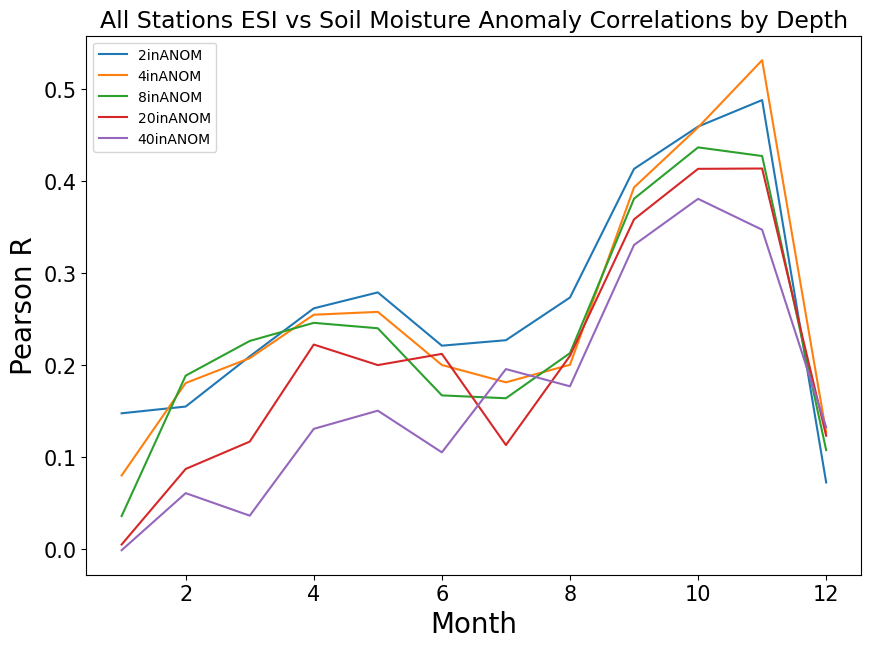

In [46]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(monthCorr['2inANOM'], label='2inANOM')
ax.plot(monthCorr['4inANOM'], label='4inANOM')
ax.plot(monthCorr['8inANOM'], label='8inANOM')
ax.plot(monthCorr['20inANOM'], label='20inANOM')
ax.plot(monthCorr['40inANOM'], label='40inANOM')
ax.legend()
ax.set_title('All Stations ESI vs Soil Moisture Anomaly Correlations by Depth', fontsize=17)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Pearson R', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [47]:
#lets test a simple weighted 4inANOM versus ESI 
weightTest = finalFrame[(finalFrame['station']=='2053:AL:SCAN')&(finalFrame.index.year==2006)]

In [48]:
weightTest[['ESI', '4inANOM']].corr()

ESI   4inANOM
ESI      1.000000  0.201652
4inANOM  0.201652  1.000000

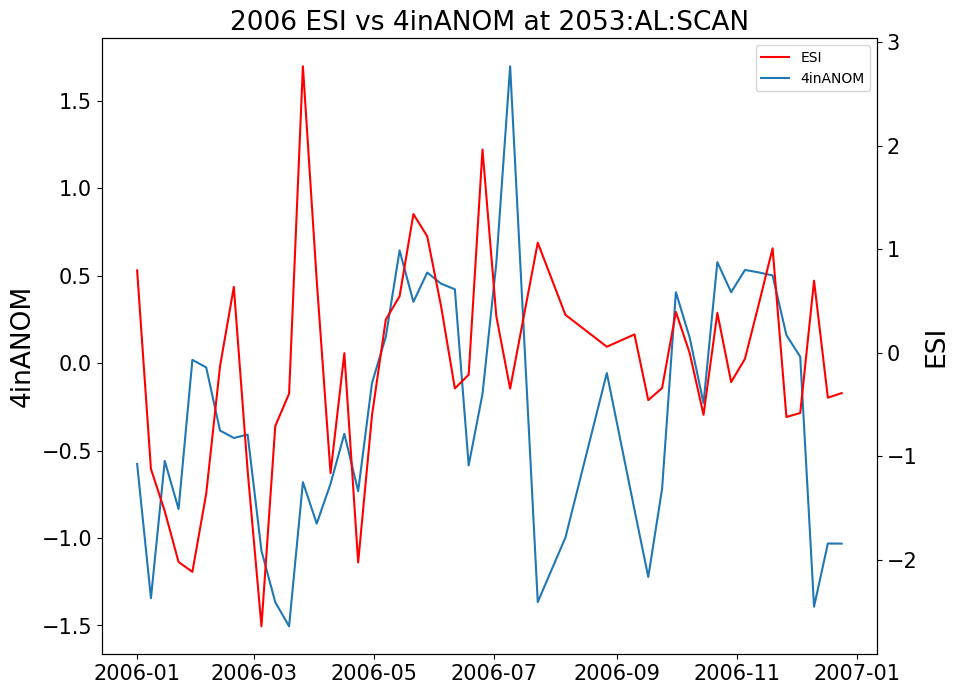

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
ax2=ax.twinx()
ESI_, = ax2.plot(weightTest['ESI'], label='ESI', color='red')
SMS_, = ax.plot(weightTest['4inANOM'], label='4inANOM')
ax.legend(handles=[ESI_, SMS_])
ax.set_title('2006 ESI vs 4inANOM at 2053:AL:SCAN', fontsize=19)
ax2.set_ylabel('ESI', fontsize=19)
ax.set_ylabel('4inANOM', fontsize=19)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [51]:
only_two_true = finalFrame[~np.isnan(finalFrame['2inANOM'])]
y_pred_two = only_two_true['ESI_sign']
x_true2in = only_two_true['2inANOM_sign']
print(len(only_two_true))

9147


In [52]:
TwoDataForPlot = confusion_matrix(x_true2in, y_pred_two)

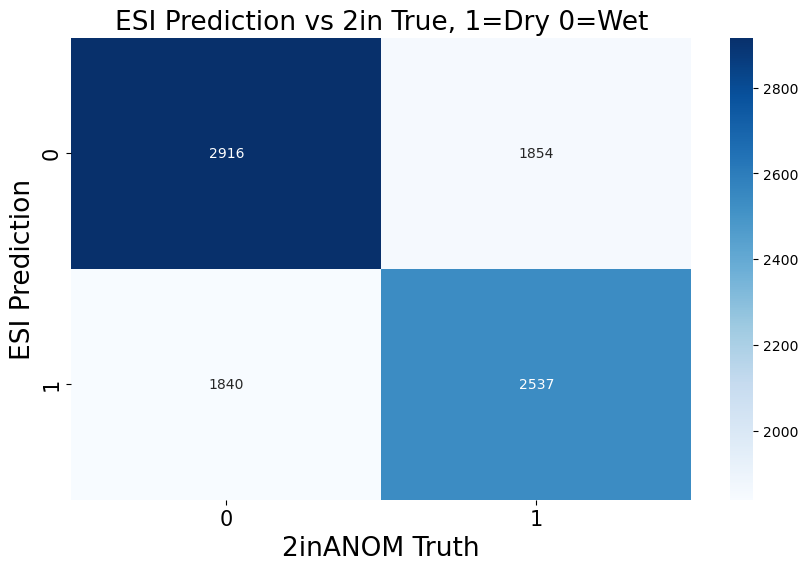

In [53]:
#two in plot
fig, ax = plt.subplots(figsize=(10,6))
hm = sns.heatmap(TwoDataForPlot, annot=True, cmap="Blues", fmt='g') #two in confusion overall
hm.set(xlabel='2in True', ylabel='ESI pred')
hm.set_title('ESI Prediction vs 2in True, 1=Dry 0=Wet', fontsize=19)
hm.set_ylabel('ESI Prediction', fontsize=19)
hm.set_xlabel('2inANOM Truth', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
#ESI 1 means dry and 0 means wet 

In [54]:
only_four_true = finalFrame[~np.isnan(finalFrame['4inANOM'])]
y_pred_four = only_four_true['ESI_sign']
x_true4in = only_four_true['4inANOM_sign']
print(len(only_four_true))

8762


In [55]:
FourDataForPlot = confusion_matrix(x_true4in, y_pred_four)

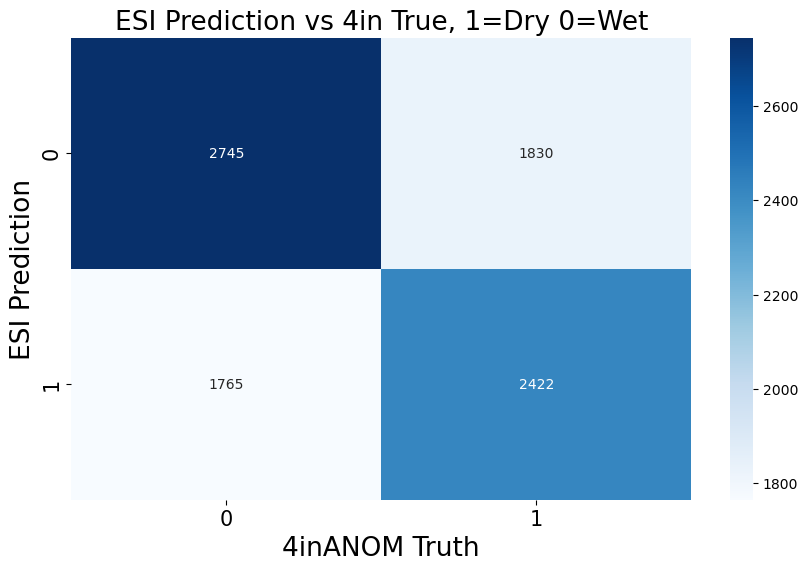

In [56]:
#four in plot
fig, ax = plt.subplots(figsize=(10,6))
hm = sns.heatmap(FourDataForPlot, annot=True, cmap="Blues", fmt='g')
hm.set(xlabel='4in True', ylabel='ESI pred', title='ESI Pred vs 4in True, 1=Dry 0=Wet')
hm.set_title('ESI Prediction vs 4in True, 1=Dry 0=Wet', fontsize=19)
hm.set_ylabel('ESI Prediction', fontsize=19)
hm.set_xlabel('4inANOM Truth', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [57]:
only_eight_true = finalFrame[~np.isnan(finalFrame['8inANOM'])]
y_pred_eight = only_eight_true['ESI_sign']
x_true8in = only_eight_true['8inANOM_sign']
print(len(only_eight_true))

9031


In [58]:
EightDataForPlot = confusion_matrix(x_true8in, y_pred_eight)

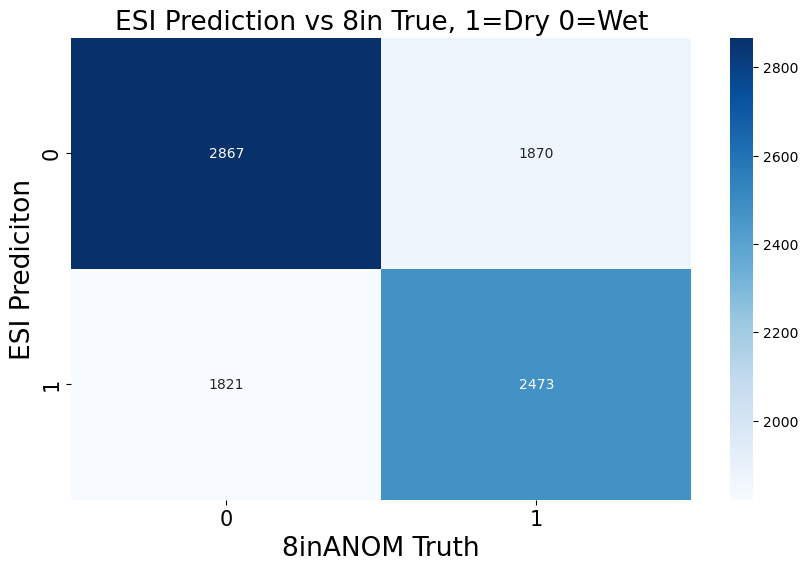

In [59]:
#Eight in plot
fig, ax = plt.subplots(figsize=(10,6))
hm = sns.heatmap(EightDataForPlot, annot=True, cmap="Blues", fmt='g') #eight in confusion overall
hm.set(xlabel='8in True', ylabel='ESI pred', title='ESI Pred vs 8in True, 1=Dry 0=Wet')
hm.set_title('ESI Prediction vs 8in True, 1=Dry 0=Wet', fontsize=19)
hm.set_ylabel('ESI Prediciton', fontsize=19)
hm.set_xlabel('8inANOM Truth', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [60]:
only_twenty_true = finalFrame[~np.isnan(finalFrame['20inANOM'])]
y_pred_twenty = only_twenty_true['ESI_sign']
x_true20in = only_twenty_true['20inANOM_sign']
print(len(only_twenty_true))

8888


In [61]:
TwentyDataForPlot = confusion_matrix(x_true20in, y_pred_twenty)

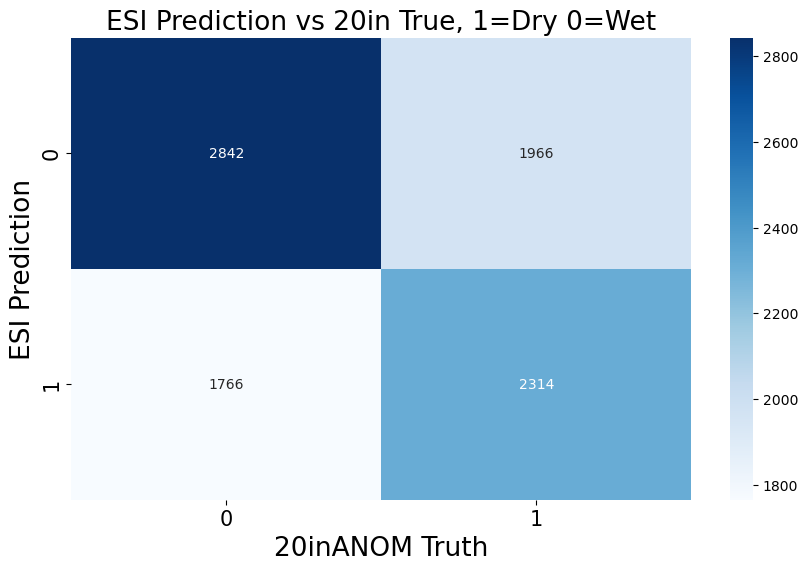

In [62]:
#Twenty in Plot
fig, ax=plt.subplots(figsize=(10,6))
hm = sns.heatmap(TwentyDataForPlot, annot=True, cmap="Blues", fmt='g') #two in confusion overall
hm.set(xlabel='20in True', ylabel='ESI pred', title='ESI Pred vs 20in True, 1=Dry 0=Wet')
hm.set_title('ESI Prediction vs 20in True, 1=Dry 0=Wet', fontsize=19)
hm.set_ylabel('ESI Prediction', fontsize=19)
hm.set_xlabel('20inANOM Truth', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [63]:
only_forty_true = finalFrame[~np.isnan(finalFrame['40inANOM'])]
y_pred_forty = only_forty_true['ESI_sign']
x_true40in = only_forty_true['40inANOM_sign']
print(len(only_forty_true))

8193


In [64]:
FortyDataForPlot = confusion_matrix(x_true40in, y_pred_forty)

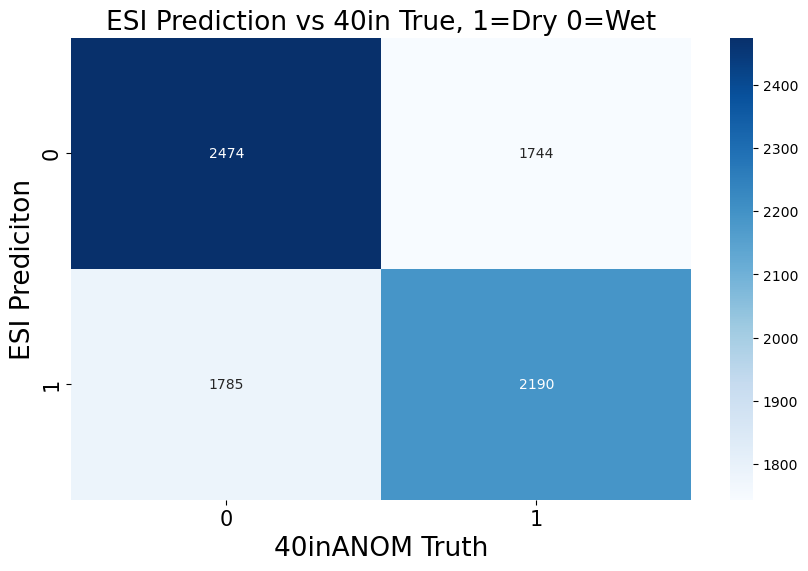

In [65]:
#Forty in Plot
fig, ax = plt.subplots(figsize=(10,6))
hm = sns.heatmap(FortyDataForPlot, annot=True, cmap="Blues", fmt='g') #two in confusion overall
hm.set(xlabel='40in True', ylabel='ESI pred', title='ESI Pred vs 40in True, 1=Dry 0=Wet')
hm.set_title('ESI Prediction vs 40in True, 1=Dry 0=Wet', fontsize=19)
hm.set_ylabel('ESI Prediciton', fontsize=19)
hm.set_xlabel('40inANOM Truth', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [66]:
TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred_two).ravel()
FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred_four).ravel()
EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred_eight).ravel()
TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred_twenty).ravel()
FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred_forty).ravel()

In [67]:
TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)

In [68]:
print(TwoAccuracy, FourAccuracy, EightAccuracy, TwentyAccuracy, FortyAccuracy)

0.5961517437411173 0.5897055466788405 0.5912966448898239 0.5801080108010801 0.569266446966923


In [69]:
accuracies = [TwoAccuracy, FourAccuracy, EightAccuracy, TwentyAccuracy, FortyAccuracy]
labels = ['2inANOM', '4inANOM', '8inANOM','20inANOM','40inANOM']

In [70]:
AccuracyDF = pd.DataFrame()
AccuracyDF['Accuracy'] = accuracies
AccuracyDF['Index'] = labels

In [71]:
AccuracyDF.set_index('Index', inplace=True)

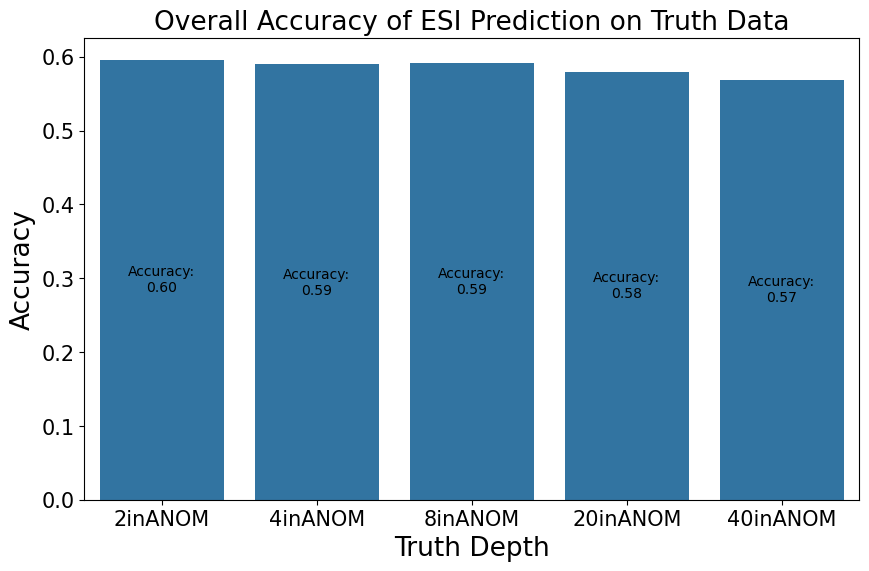

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
bar=sns.barplot(data=AccuracyDF, x=AccuracyDF.index, y=AccuracyDF['Accuracy'], ax=ax)
ax.set_title('Overall Accuracy of ESI Prediction on Truth Data', fontsize=19)
ax.bar_label(ax.containers[-1], fmt='Accuracy:\n%.2f', label_type='center')
ax.set_xlabel('Truth Depth', fontsize=19)
ax.set_ylabel('Accuracy', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [73]:
count = 0
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
while count != len(stddevList)-1:
    lower = stddevList[count+1]
    upper = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=upper)&(finalFrame['ESI']<=lower)]
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inANOM_sign']
    x_true4in = frame['4inANOM_sign']
    x_true8in = frame['8inANOM_sign']
    x_true20in = frame['20inANOM_sign']
    x_true40in = frame['40inANOM_sign']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    count+=1

In [74]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Brackets'] = ['-3,-2.5', '-2.5,-2.0', '-2.0,-1.5', '-1.5,-1.0', '-1.0,-0.5', '-0.5,0.0', '0.0,0.5','0.5,1.0','1.0,1.5','1.5,2.0', '2.0,2.5','2.5,3.0']
BracketAccuracy['2inANOM'] = TwoListAccuracy
BracketAccuracy['4inANOM'] = FourListAccuracy
BracketAccuracy['8inANOM'] = EightListAccuracy
BracketAccuracy['20inANOM'] = TwentyListAccuracy
BracketAccuracy['40inANOM'] = FortyListAccuracy

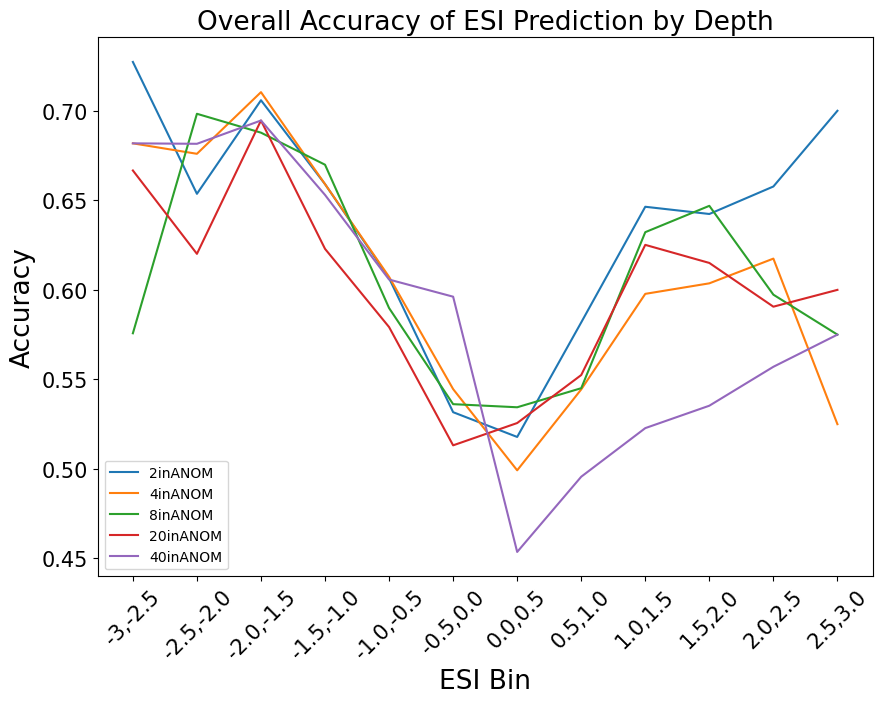

In [75]:
fig, ax = plt.subplots(figsize=(10,7))
plot = sns.lineplot(x='Brackets', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Brackets']), ax=ax)
plot.set(ylabel='Accuracy', xlabel='Bins')
ax.legend()
ax.set_title('Overall Accuracy of ESI Prediction by Depth', fontsize=19)
ax.set_ylabel('Accuracy', fontsize=19)
ax.set_xlabel('ESI Bin', fontsize=19)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.tick_params(axis='x', rotation=45)

In [76]:
def getDrySoilAnomSign(x,augment=None):
    if augment==None:
        if x <= upper:
            return 1 
        else:
            return 0
    else:
        new = upper + augment
        if x<=new:
            return 1
        else:
            return 0

In [77]:
count = 0
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
number = []
while count != 6:
    upper = stddevList[count+1]
    lower = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=lower)&(finalFrame['ESI']<=upper)]
    frame['2inBelowUpper'] = frame['2inANOM'].apply(getDrySoilAnomSign) #we want to know if soil anom is actually in ESI range for true predictions
    frame['4inBelowUpper'] = frame['4inANOM'].apply(getDrySoilAnomSign)
    frame['8inBelowUpper'] = frame['8inANOM'].apply(getDrySoilAnomSign)
    frame['20inBelowUpper'] = frame['20inANOM'].apply(getDrySoilAnomSign)
    frame['40inBelowUpper'] = frame['40inANOM'].apply(getDrySoilAnomSign)
    n = len(frame)
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inBelowUpper']
    x_true4in = frame['4inBelowUpper']
    x_true8in = frame['8inBelowUpper']
    x_true20in = frame['20inBelowUpper']
    x_true40in = frame['40inBelowUpper']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    number.append(n)
    count+=1

In [78]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Below Bin'] = ['-2.5', '-2.0', '-1.5', '-1.0', '-0.5', '0.0']
BracketAccuracy['SMS-2.0in Accuracy'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in Accuracy'] = FourListAccuracy
BracketAccuracy['SMS-8.0in Accuracy'] = EightListAccuracy
BracketAccuracy['SMS-20.0in Accuracy'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in Accuracy'] = FortyListAccuracy

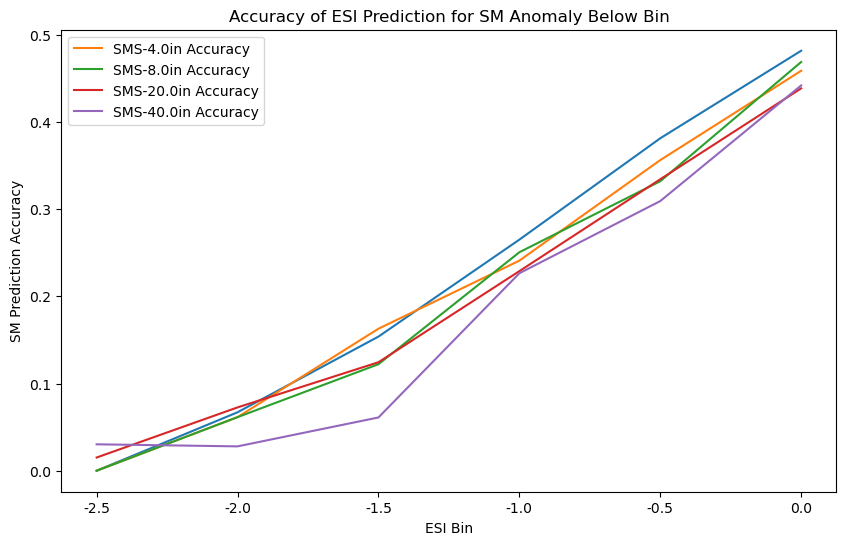

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.lineplot(x='Below Bin', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Below Bin']), ax=ax)
plot.set(ylabel='SM Prediction Accuracy', xlabel='ESI Bin', title='Accuracy of ESI Prediction for SM Anomaly Below Bin')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

In [80]:
count=0
Correlationcount = 0
shiftBracket=2
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
number = []
while count != 6:
    upper = stddevList[count+1]
    lower = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=lower)&(finalFrame['ESI']<=upper)]
    frame['2inBelowUpper'] = frame['2inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket) #we want to know if soil anom is within 2 points of ESI to the right
    frame['4inBelowUpper'] = frame['4inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['8inBelowUpper'] = frame['8inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['20inBelowUpper'] = frame['20inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['40inBelowUpper'] = frame['40inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    n = len(frame)
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inBelowUpper']
    x_true4in = frame['4inBelowUpper']
    x_true8in = frame['8inBelowUpper']
    x_true20in = frame['20inBelowUpper']
    x_true40in = frame['40inBelowUpper']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    number.append(n)
    count+=1
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Below Bin'] = ['-2.5'+'+'+str(shiftBracket), '-2.0'+'+'+str(shiftBracket), '-1.5'+'+'+str(shiftBracket), '-1.0'+'+'+str(shiftBracket), '-0.5'+'+'+str(shiftBracket), '-0.0'+'+'+str(shiftBracket)]
BracketAccuracy['SMS-2.0in'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in'] = FourListAccuracy
BracketAccuracy['SMS-8.0in'] = EightListAccuracy
BracketAccuracy['SMS-20.0in'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in'] = FortyListAccuracy

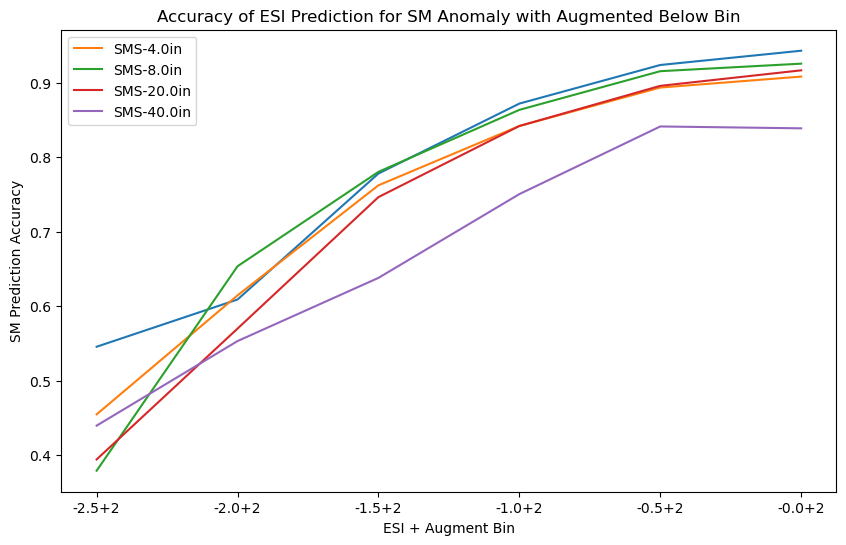

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.lineplot(x='Below Bin', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Below Bin']), ax=ax)
plot.set(ylabel='SM Prediction Accuracy', xlabel='ESI + Augment Bin', title='Accuracy of ESI Prediction for SM Anomaly with Augmented Below Bin')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

In [82]:
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
month = [] 
for m in finalFrame.index.month.unique():
    month.append(m)
    monthFrame = finalFrame[finalFrame.index.month==m]
    y_pred = monthFrame['ESI_sign']
    x_true2in = monthFrame['2inANOM_sign']
    x_true4in = monthFrame['4inANOM_sign']
    x_true8in = monthFrame['8inANOM_sign']
    x_true20in = monthFrame['20inANOM_sign']
    x_true40in = monthFrame['40inANOM_sign']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)

In [83]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Month'] = month
BracketAccuracy['2inANOM'] = TwoListAccuracy
BracketAccuracy['4inANOM'] = FourListAccuracy
BracketAccuracy['8inANOM'] = EightListAccuracy
BracketAccuracy['20inANOM'] = TwentyListAccuracy
BracketAccuracy['40inANOM'] = FortyListAccuracy

In [84]:
BracketAccuracy.sort_values('Month')

Month   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM
9       1  0.519914  0.514532  0.519914  0.482239  0.482239
10      2  0.548431  0.553888  0.540246  0.515689  0.527967
11      3  0.576316  0.578947  0.581579  0.530263  0.494737
0       4  0.616480  0.579858  0.594100  0.582909  0.547304
1       5  0.567531  0.581173  0.590723  0.568895  0.556617
2       6  0.589905  0.552050  0.558360  0.548896  0.534700
3       7  0.549096  0.545220  0.552972  0.538760  0.559432
4       8  0.589896  0.545319  0.566122  0.595840  0.561664
5       9  0.640407  0.630241  0.644219  0.649301  0.630241
6      10  0.659164  0.610932  0.647374  0.637728  0.621651
7      11  0.660777  0.656066  0.630153  0.654888  0.599529
8      12  0.536117  0.527088  0.546275  0.522573  0.532731

In [85]:
BracketAccuracy.describe()

Month    2inANOM    4inANOM    8inANOM   20inANOM   40inANOM
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000
mean    6.500000   0.587836   0.572943   0.581003   0.568998   0.554068
std     3.605551   0.047566   0.042247   0.041781   0.056252   0.045494
min     1.000000   0.519914   0.514532   0.519914   0.482239   0.482239
25%     3.750000   0.548929   0.545295   0.551298   0.528341   0.531540
50%     6.500000   0.583106   0.566418   0.573850   0.558895   0.551960
75%     9.250000   0.622462   0.588613   0.603113   0.606312   0.571130
max    12.000000   0.660777   0.656066   0.647374   0.654888   0.630241

In [86]:
BracketAccuracy.set_index('Month', inplace=True)

In [87]:
BracketAccuracy.sort_index(inplace=True)

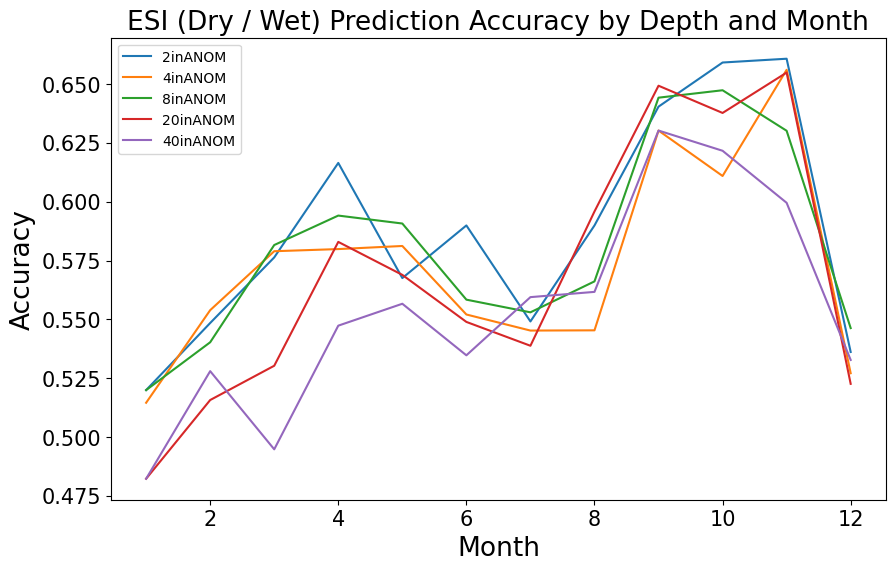

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
BracketAccuracy.plot(ax=ax)
ax.set_title('ESI (Dry / Wet) Prediction Accuracy by Depth and Month', fontsize=19)
ax.set_xlabel('Month', fontsize=19)
ax.set_ylabel('Accuracy', fontsize=19)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [89]:
df = finalFrame[['station', 'week_x', 'ESI', '2inANOM', '4inANOM', '8inANOM', '20inANOM','40inANOM']]

In [90]:
df = df[df['station']=='2078:AL:SCAN'][['ESI', '2inANOM', '4inANOM','8inANOM','20inANOM','40inANOM']]

Text(0.5, 1.0, '2078:AL:SCAN 2015 Drought Year Anomaly Cumulative Sum')

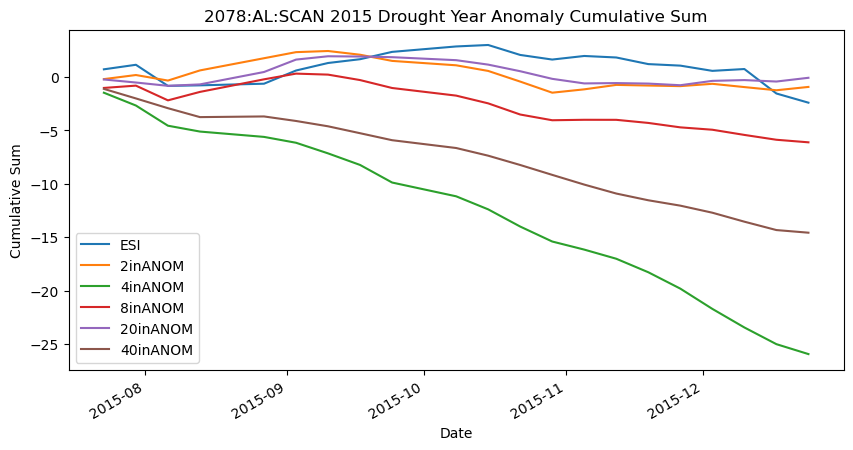

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
data = df[df.index.year==2015].cumsum()
data.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Sum')
ax.set_title('2078:AL:SCAN 2015 Drought Year Anomaly Cumulative Sum')

Text(0.5, 1.0, '2078:AL:SCAN 2012 Drought Year Anomaly Cumulative Sum')

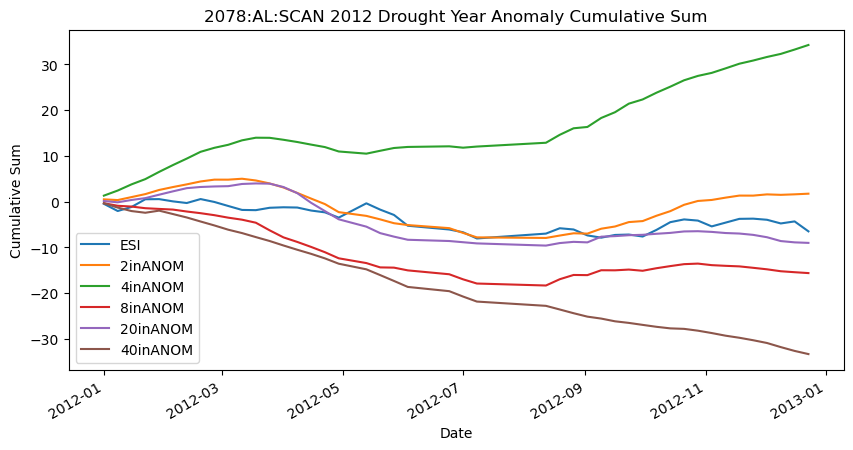

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
data = df[df.index.year==2012].cumsum()
data.plot(ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Sum')
ax.set_title('2078:AL:SCAN 2012 Drought Year Anomaly Cumulative Sum')

In [93]:
data

ESI   2inANOM    4inANOM    8inANOM  20inANOM   40inANOM
Date                                                                  
2012-01-01 -0.497  0.479086   1.291479  -0.361265  0.113678  -0.365860
2012-01-08 -2.069  0.324622   2.404458  -0.926850 -0.163439  -1.319315
2012-01-15 -1.187  0.974855   3.758035  -1.097126  0.343493  -2.081464
2012-01-22  0.499  1.627853   4.907534  -1.456649  0.749241  -2.450177
2012-01-29  0.530  2.533749   6.489503  -1.613195  1.497738  -1.986617
2012-02-05  0.038  3.171759   7.980794  -1.757136  2.232766  -2.734675
2012-02-12 -0.321  3.758190   9.394818  -2.180724  2.928754  -3.484988
2012-02-19  0.543  4.392617  10.881026  -2.546783  3.186712  -4.365799
2012-02-26 -0.092  4.792058  11.757164  -2.982456  3.300587  -5.227931
2012-03-04 -0.969  4.787916  12.414442  -3.525721  3.365571  -6.156779
2012-03-11 -1.834  4.990397  13.390997  -3.966677  3.843855  -6.896845
2012-03-18 -1.883  4.608658  13.964282  -4.629411  3.961595  -7.777387
2012-03-25 -1.362  3.958914  13.940736  -6.296598  3.914766  -8.632436
2012-04-01 -1.254  3.072560  13.511810  -7.836826  3.176226  -9.610277
2012-04-08 -1.309  1.880282  13.024758  -8.834938  1.830301 -10.544907
2012-04-15 -1.967  0.648107  12.455923  -9.925082 -0.275524 -11.438993
2012-04-22 -2.362 -0.555762  11.914285 -11.080613 -2.086416 -12.431827
2012-04-29 -3.516 -2.315013  10.953848 -12.414954 -3.882390 -13.597379
2012-05-13 -0.388 -3.136479  10.475927 -13.458888 -5.491102 -14.825919
2012-05-20 -1.765 -3.899936  11.105976 -14.402287 -6.908760 -16.088204
2012-05-27 -2.931 -4.738713  11.714577 -14.456865 -7.676765 -17.369188
2012-06-03 -5.292 -5.142922  11.945238 -15.056463 -8.360064 -18.676289
2012-06-24 -6.116 -5.819501  12.080225 -15.905157 -8.634712 -19.603554
2012-07-01 -6.719 -6.859399  11.782734 -17.011911 -8.896765 -20.780753
2012-07-08 -8.076 -7.836627  12.029438 -17.932923 -9.154983 -21.879030
2012-08-12 -7.012 -7.963103  12.861835 -18.365711 -9.634504 -22.813444
2012-08-19 -5.841 -7.435915  14.600225 -16.991337 -9.082183 -23.612635
2012-08-26 -6.110 -6.946187  16.025041 -16.060065 -8.816588 -24.424752
2012-09-02 -7.406 -7.013170  16.315153 -16.095617 -8.929553 -25.175825
2012-09-09 -7.901 -5.942000  18.283543 -15.026753 -7.684606 -25.599872
2012-09-16 -7.307 -5.457864  19.539793 -15.042563 -7.564373 -26.196249
2012-09-23 -7.219 -4.493419  21.412727 -14.880262 -7.363500 -26.544822
2012-09-30 -7.651 -4.272230  22.334078 -15.140281 -7.275616 -26.977685
2012-10-07 -6.202 -3.106088  23.808246 -14.584542 -7.050364 -27.399726
2012-10-14 -4.511 -2.102233  25.125124 -14.121570 -6.856982 -27.740913
2012-10-21 -3.908 -0.708877  26.527446 -13.694284 -6.538777 -27.849836
2012-10-28 -4.166  0.127845  27.483923 -13.573444 -6.486411 -28.245197
2012-11-04 -5.436  0.349809  28.143366 -13.911195 -6.637793 -28.764910
2012-11-11 -4.610  0.853157  29.129740 -14.060296 -6.886000 -29.339961
2012-11-18 -3.786  1.303923  30.149189 -14.180571 -6.997174 -29.794207
2012-11-25 -3.743  1.296428  30.844746 -14.494082 -7.288598 -30.335728
2012-12-02 -3.986  1.567267  31.625358 -14.822905 -7.804851 -30.939738
2012-12-09 -4.791  1.467059  32.296935 -15.245671 -8.644074 -31.840070
2012-12-16 -4.345  1.578271  33.244775 -15.457230 -8.926728 -32.674059
2012-12-23 -6.519  1.720584  34.245360 -15.649476 -9.043534 -33.365194

In [94]:
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
year = [] 
station = []
number_observations = []

for i in finalFrame.station.unique():
    stationFrame = finalFrame[finalFrame['station']==i]
    for y in stationFrame.index.year.unique():
        yearFrame = stationFrame[stationFrame.index.year == y]
        if len(yearFrame)<4:
            pass
        else:
            number_observations.append(len(yearFrame))
            station.append(i)
            year.append(y)
            y_pred = yearFrame['ESI_sign']
            x_true2in = yearFrame['2inANOM_sign']
            x_true4in = yearFrame['4inANOM_sign']
            x_true8in = yearFrame['8inANOM_sign']
            x_true20in = yearFrame['20inANOM_sign']
            x_true40in = yearFrame['40inANOM_sign']
            TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
            FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
            EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
            TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
            FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
            TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
            FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
            EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
            TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
            FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
            TwoListAccuracy.append(TwoAccuracy)
            FourListAccuracy.append(FourAccuracy)
            EightListAccuracy.append(EightAccuracy)
            TwentyListAccuracy.append(TwentyAccuracy)
            FortyListAccuracy.append(FortyAccuracy)
stationAccuracy = pd.DataFrame()
stationAccuracy['SMS-2.0in'] = TwoListAccuracy
stationAccuracy['SMS-4.0in'] = FourListAccuracy
stationAccuracy['SMS-8.0in'] = EightListAccuracy
stationAccuracy['SMS-20.0in'] = TwentyListAccuracy
stationAccuracy['SMS-40.0in'] = FortyListAccuracy
stationAccuracy['year'] = year
stationAccuracy['station']=station

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: >]


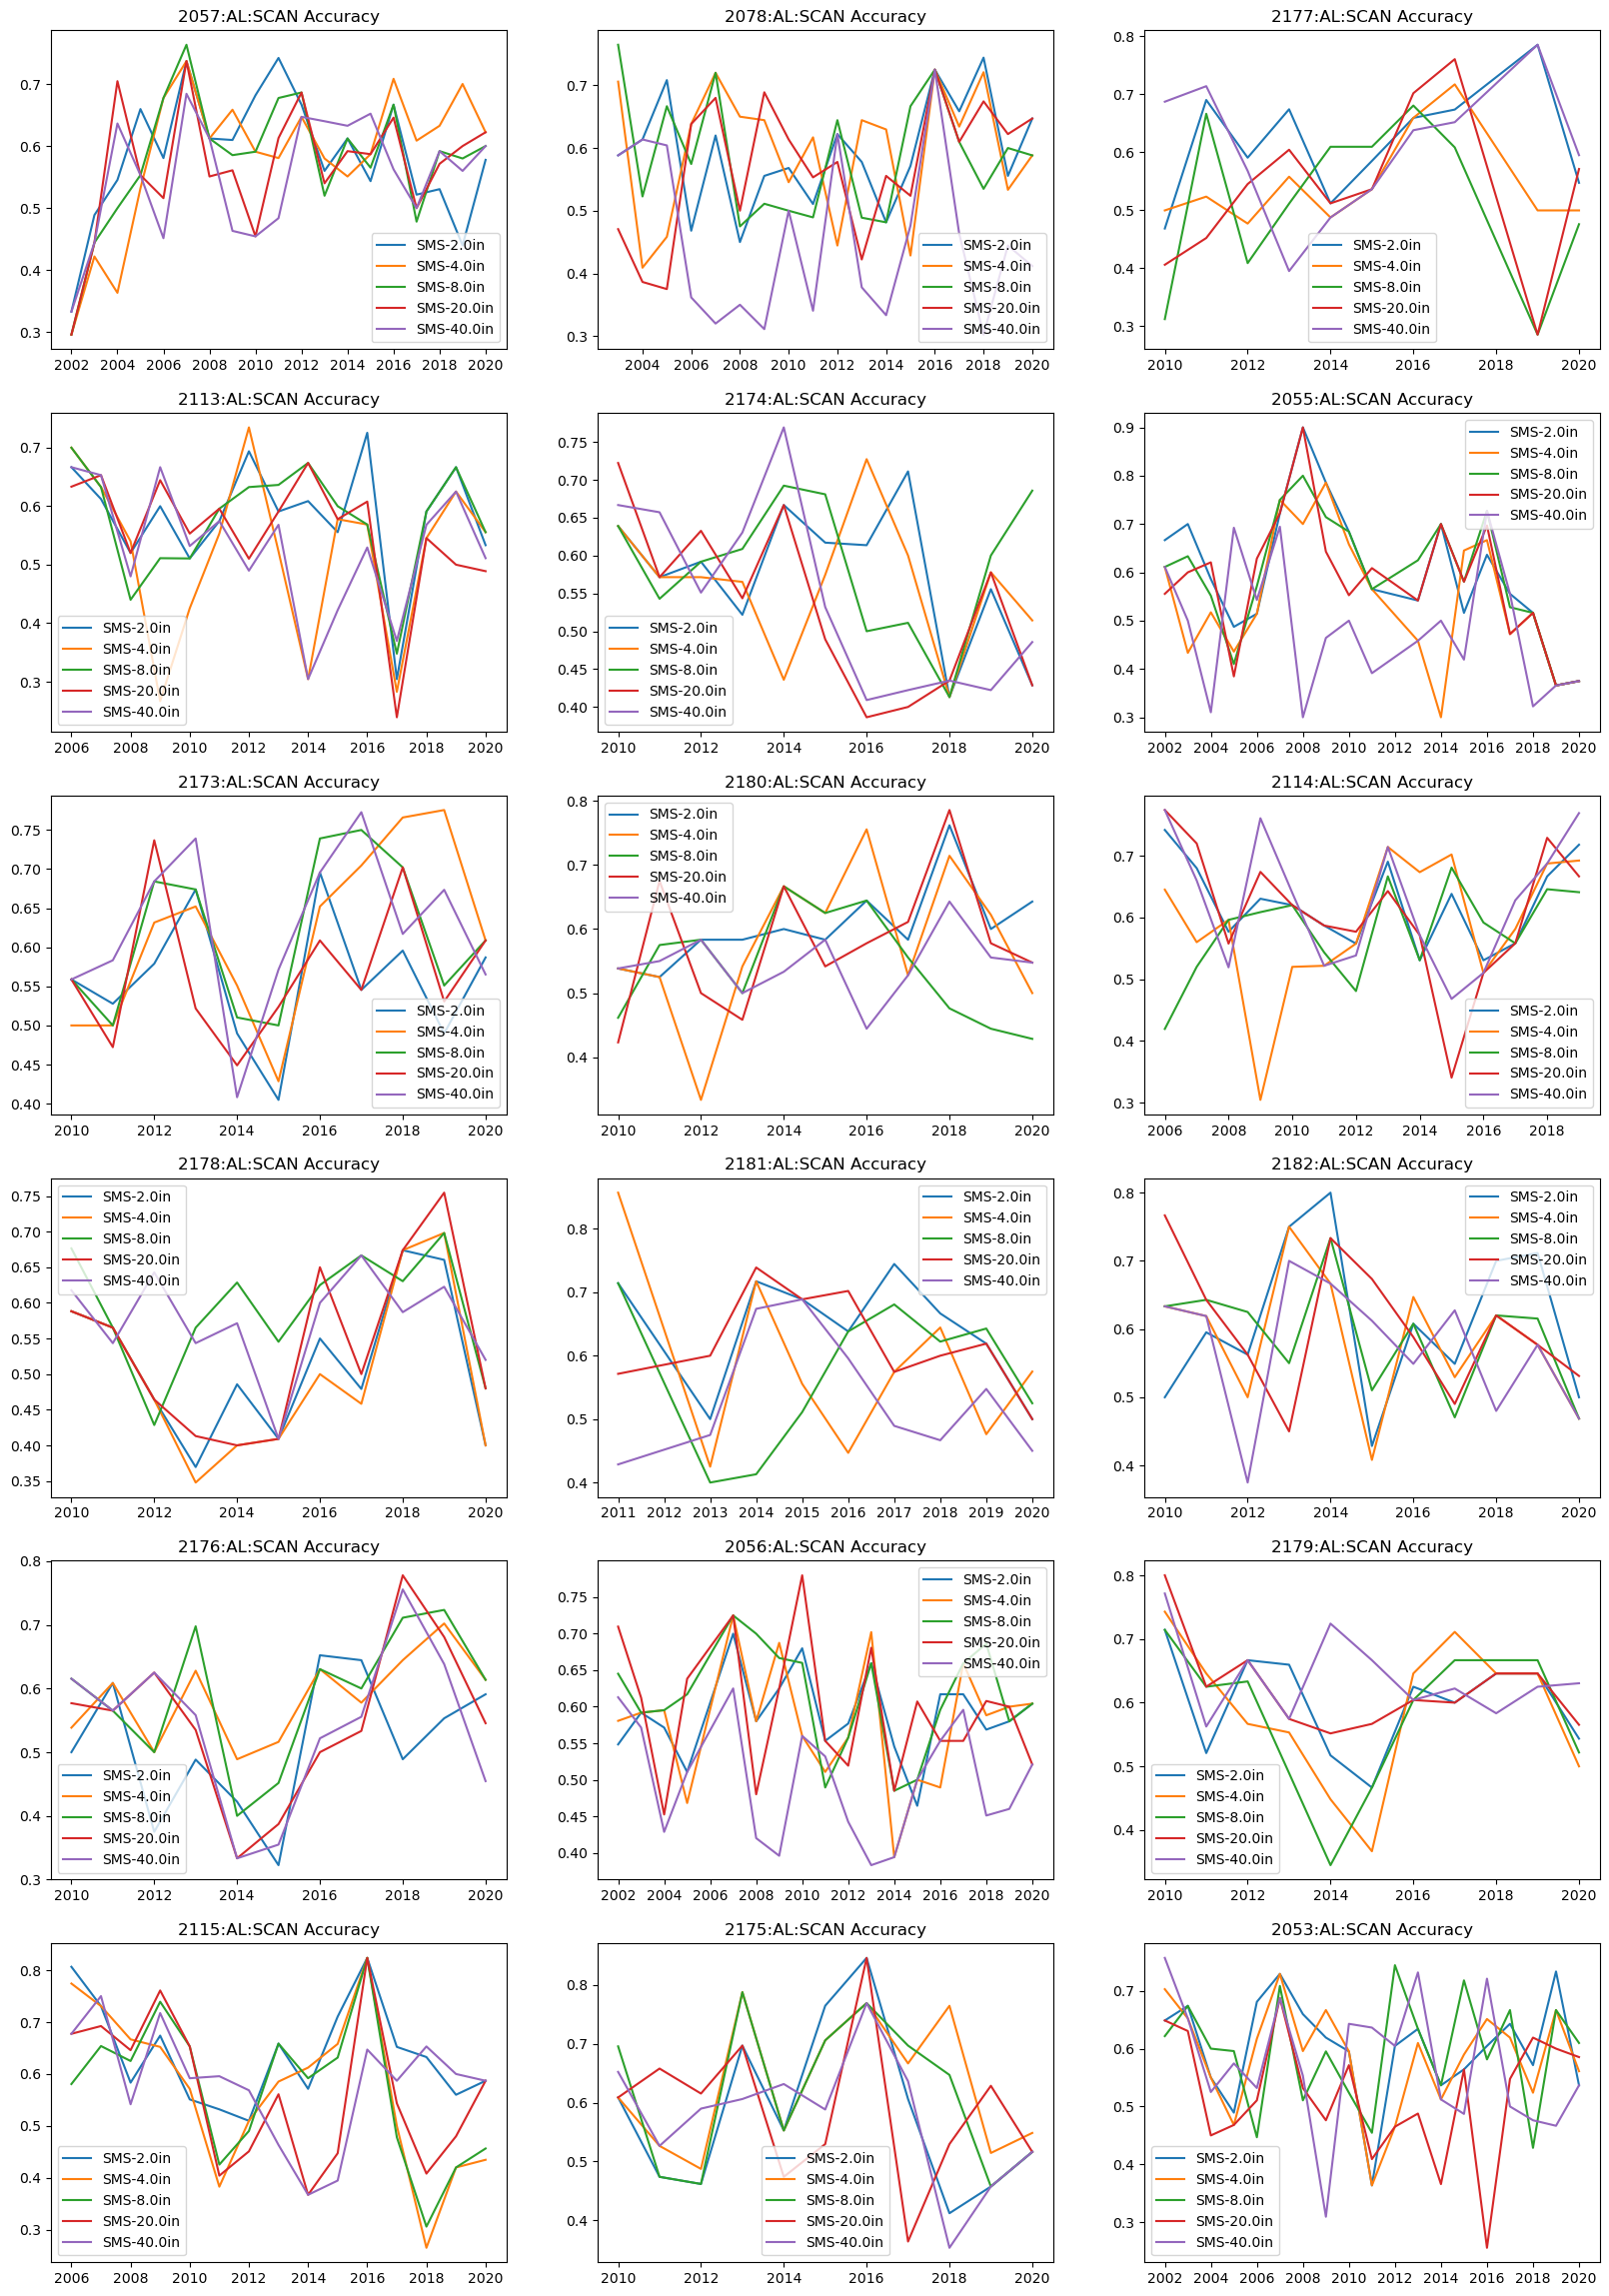

In [95]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,29))
axes = ax.flatten()
print(axes)
count = 0
for station in stationAccuracy.station.unique():
    stationFrame=stationAccuracy[stationAccuracy['station']==station]
    stationFrame.set_index('year', inplace=True)
    axes[count].plot(stationFrame['SMS-2.0in'], label='SMS-2.0in')
    axes[count].plot(stationFrame['SMS-4.0in'], label='SMS-4.0in')
    axes[count].plot(stationFrame['SMS-8.0in'], label='SMS-8.0in')
    axes[count].plot(stationFrame['SMS-20.0in'], label='SMS-20.0in')
    axes[count].plot(stationFrame['SMS-40.0in'], label='SMS-40.0in')
    axes[count].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    axes[count].legend()
    axes[count].set_title(station + " Accuracy")
    count+=1

In [96]:
#now we will do landcover analysis with accuracy 
from datasets import LANDCOVER_READ

In [97]:
#now we will interpolate landcover for each station, and return a new frame
dic = {}
for station in LANDCOVER_READ['station'].unique():
    stationFrame=LANDCOVER_READ[LANDCOVER_READ['station']==station]
    stationFrame.set_index('year', inplace=True)
    new_index = pd.Index(np.arange(stationFrame.index.min(), stationFrame.index.max(), 1), name='year')
    stationFrame = stationFrame.reindex(new_index)
    stationFrame['station']=station
    stationFrame = stationFrame.interpolate()
    stationFrame.reset_index(inplace=True)
    dic[station]=stationFrame
df = pd.concat(dic, ignore_index=True)

In [98]:
merged = stationAccuracy.merge(df, on=['station', 'year'])
merged

SMS-2.0in  SMS-4.0in  SMS-8.0in  SMS-20.0in  SMS-40.0in  year  \
0     0.333333   0.296296   0.296296    0.296296    0.333333  2002   
1     0.488889   0.422222   0.444444    0.444444    0.444444  2003   
2     0.545455   0.363636   0.500000    0.704545    0.636364  2004   
3     0.659574   0.531915   0.553191    0.553191    0.553191  2005   
4     0.580645   0.677419   0.677419    0.516129    0.451613  2006   
..         ...        ...        ...         ...         ...   ...   
203   0.536585   0.512195   0.536585    0.365854    0.512195  2014   
204   0.564103   0.589744   0.717949    0.564103    0.487179  2015   
205   0.604651   0.651163   0.581395    0.255814    0.720930  2016   
206   0.642857   0.619048   0.666667    0.547619    0.500000  2017   
207   0.571429   0.523810   0.428571    0.619048    0.476190  2018   

          station  Agland percent  Water percent  Shrub percent  \
0    2057:AL:SCAN        0.253886       0.000543       0.009142   
1    2057:AL:SCAN        0.250650       0.000520       0.009957   
2    2057:AL:SCAN        0.247413       0.000496       0.010773   
3    2057:AL:SCAN        0.236729       0.000532       0.010737   
4    2057:AL:SCAN        0.226045       0.000567       0.010702   
..            ...             ...            ...            ...   
203  2053:AL:SCAN        0.781269       0.001006       0.004663   
204  2053:AL:SCAN        0.779127       0.000982       0.004071   
205  2053:AL:SCAN        0.776985       0.000959       0.003480   
206  2053:AL:SCAN        0.776985       0.000959       0.003480   
207  2053:AL:SCAN        0.776985       0.000959       0.003480   

     Forest percent  Barren percent  Herbaceous percent  Wetland percent  \
0          0.415037        0.000177            0.003107         0.002185   
1          0.414871        0.000177            0.003697         0.002209   
2          0.414706        0.000177            0.004288         0.002232   
3          0.407052        0.000177            0.005422         0.002179   
4          0.399398        0.000177            0.006556         0.002126   
..              ...             ...                 ...              ...   
203        0.039649        0.000130            0.004545         0.032453   
204        0.040134        0.000189            0.004616         0.032453   
205        0.040619        0.000249            0.004687         0.032453   
206        0.040619        0.000249            0.004687         0.032453   
207        0.040619        0.000249            0.004687         0.032453   

     Developed percent  
0             0.315923  
1             0.317919  
2             0.319915  
3             0.337172  
4             0.354429  
..                 ...  
203           0.136285  
204           0.138427  
205           0.140570  
206           0.140570  
207           0.140570  

[208 rows x 15 columns]

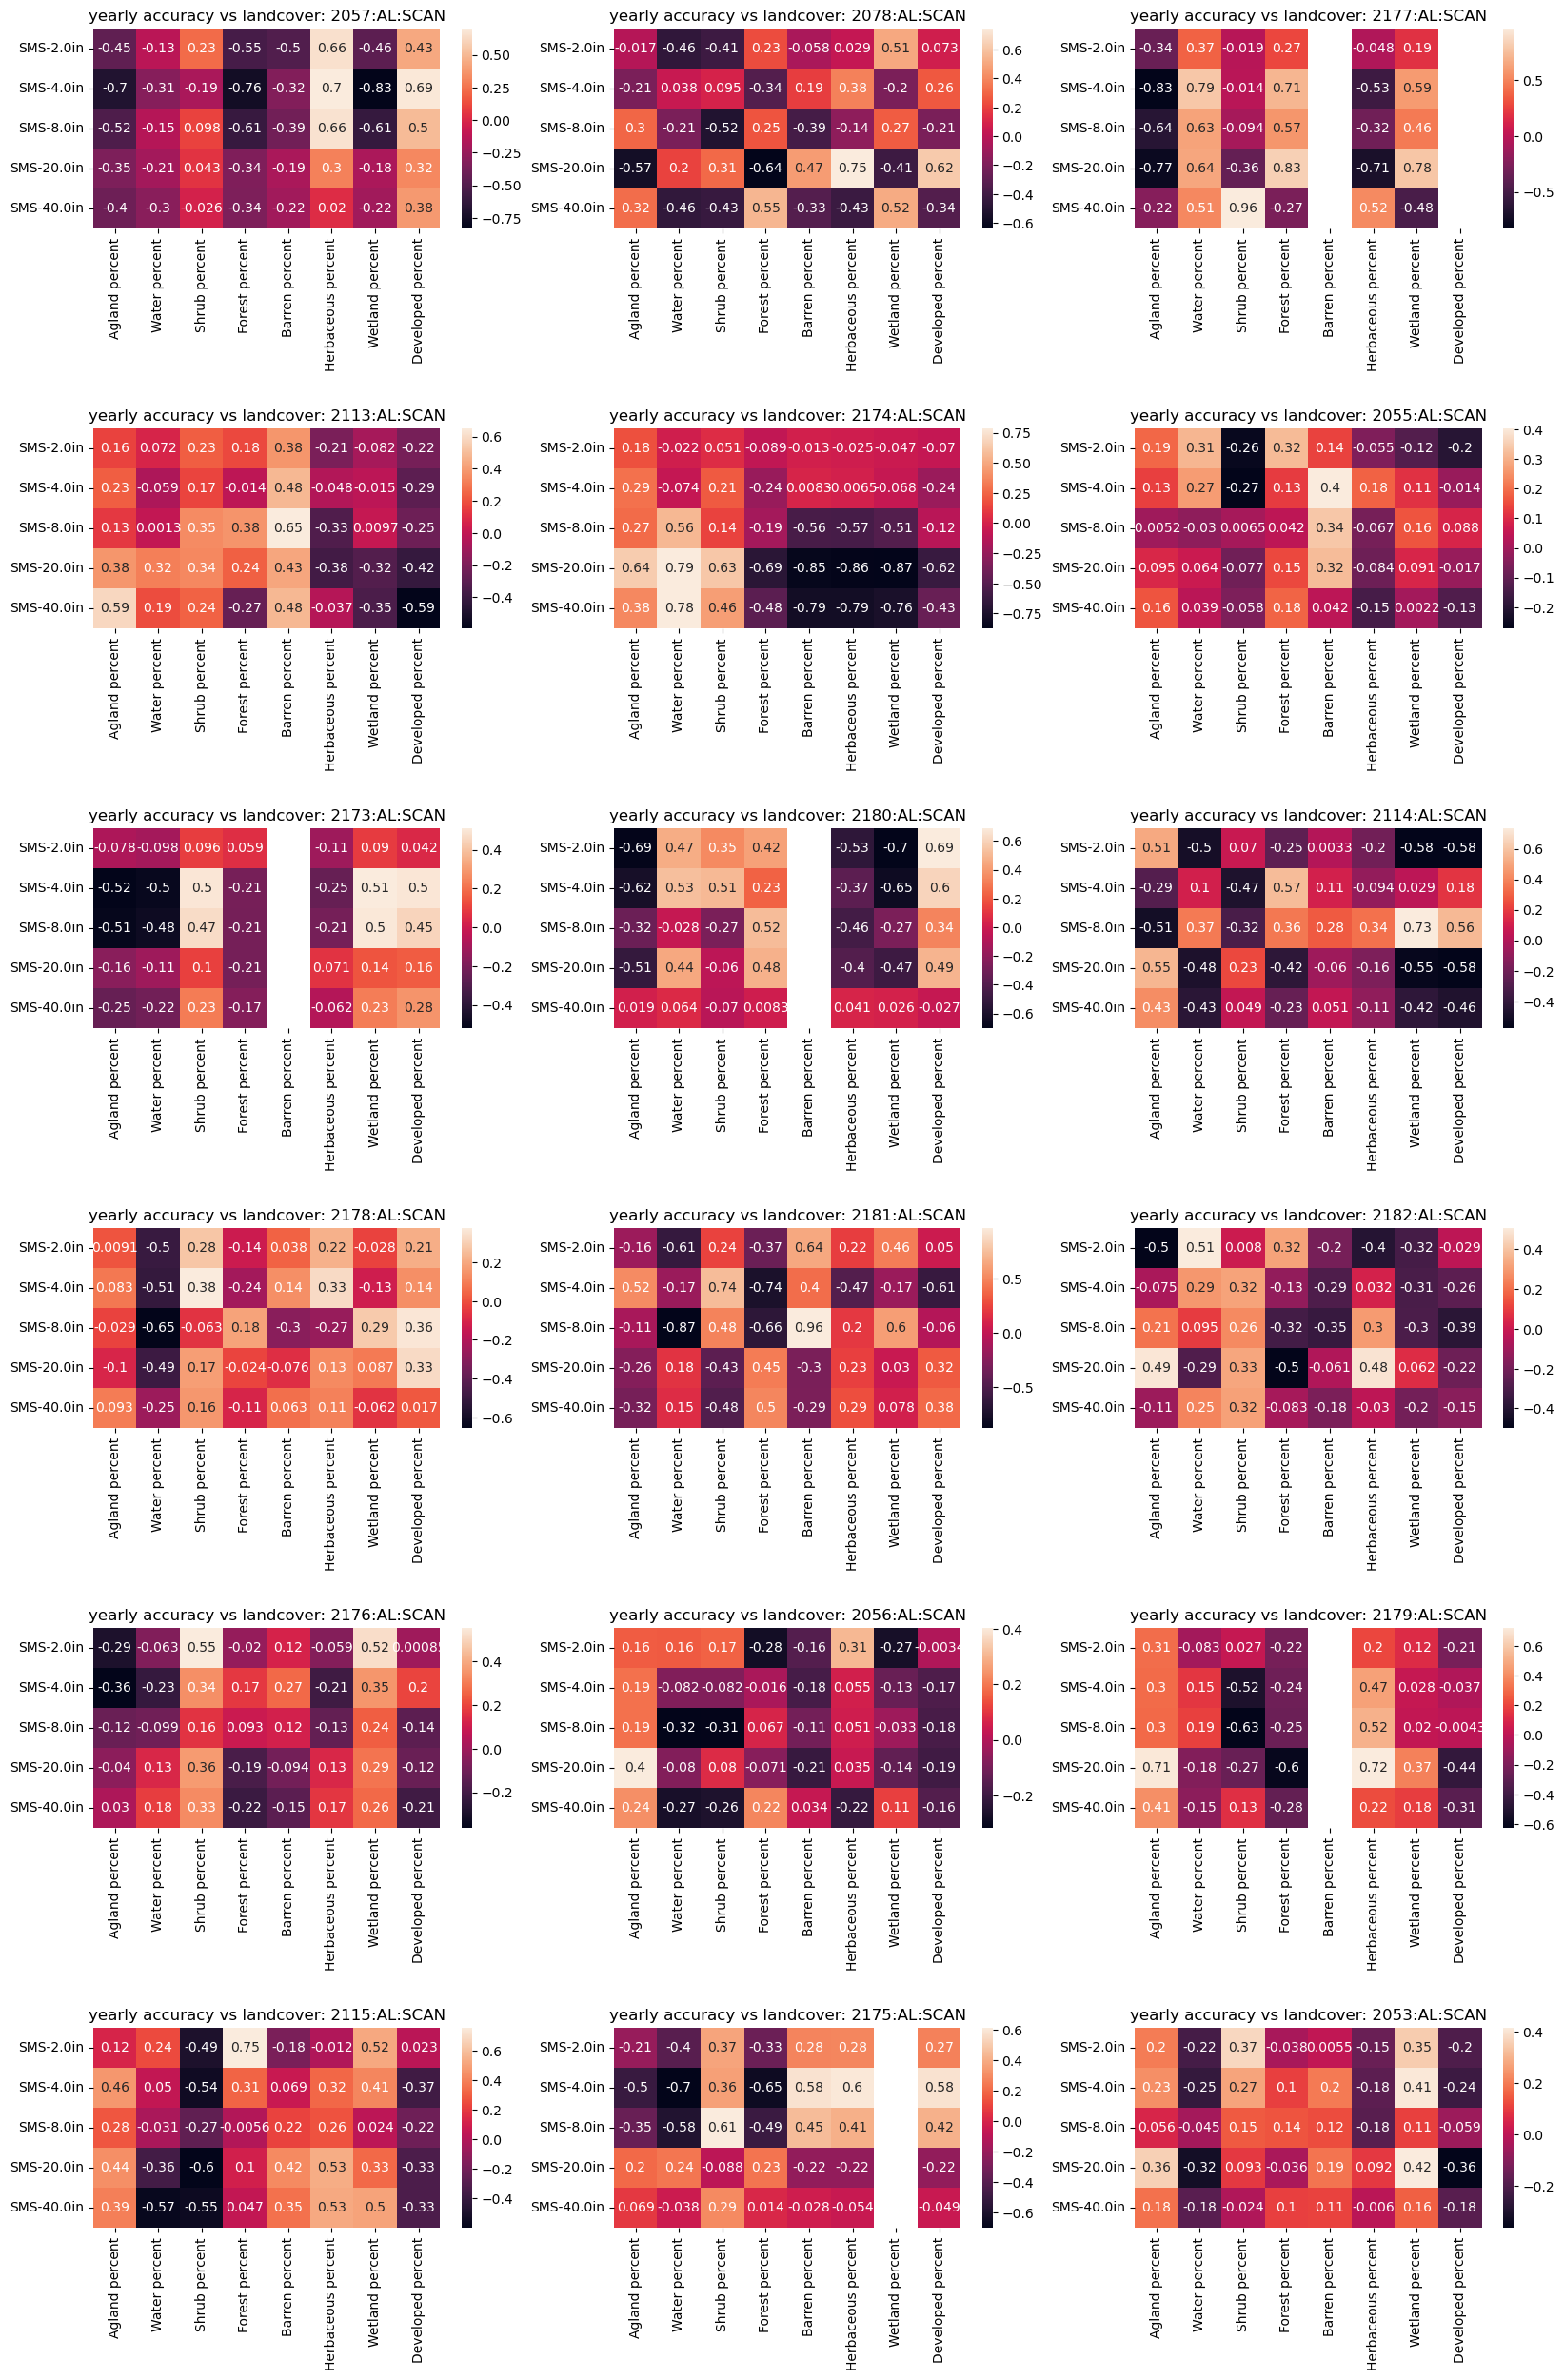

In [100]:
import seaborn as sns
fig, ax = plt.subplots(6, 3, figsize=(20, 30))
axes = ax.flatten()
count = 0 
for station in merged['station'].unique():
    stationFrame = merged[merged['station']==station]
    corr = stationFrame.drop(columns=['station']).corr()
    corr = corr[['Agland percent', 'Water percent', 'Shrub percent',
       'Forest percent', 'Barren percent', 'Herbaceous percent',
       'Wetland percent', 'Developed percent']]
    
    g = sns.heatmap(corr.head(5), annot=True, ax=axes[count])
    axes[count].set_title("yearly accuracy vs landcover: " + station)
    count+=1 
fig.subplots_adjust(hspace=1.0)

In [101]:
depths = ['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in']
types = ['Agland percent', 'Shrub percent', 'Water percent', 'Developed percent', 'Forest percent', 'Wetland percent', 'Herbaceous percent', 'Barren percent']

from scipy import stats
import numpy as np

def plotLandCoverCorrbyDepth(landtype, depth):
    """A function to return a plot of landcover percents and effect on accuracy of ALEXI prediction"""
    fig, ax = plt.subplots()
    stations = []
    landcoveravg = []
    correlation = []

    for station in merged['station'].unique():
        stationFrame = merged[merged['station']==station]
        cor = stationFrame.corr()
        cor = cor[types].head(5)
        corr = cor[cor.index==depth][landtype].item()
        landavg = stationFrame[landtype].mean()
        landcoveravg.append(landavg)
        stations.append(station)
        correlation.append(corr)
        ax.scatter(landavg, corr, label=station)
    
    x = np.array(landcoveravg)
    y = np.array(correlation)
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r, p, se = stats.linregress(x[mask], y[mask])
    r2 = r**2
    ax.set_title("{} Accuracy vs {} Pearson R".format(depth, landtype))
    textstr = "r2: {:.2f}\n p: {:.2f}".format(r2, p)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.set_xlabel(landtype + " average by station")
    ax.set_ylabel("Accuracy vs landtype Pearson R")
    return ax

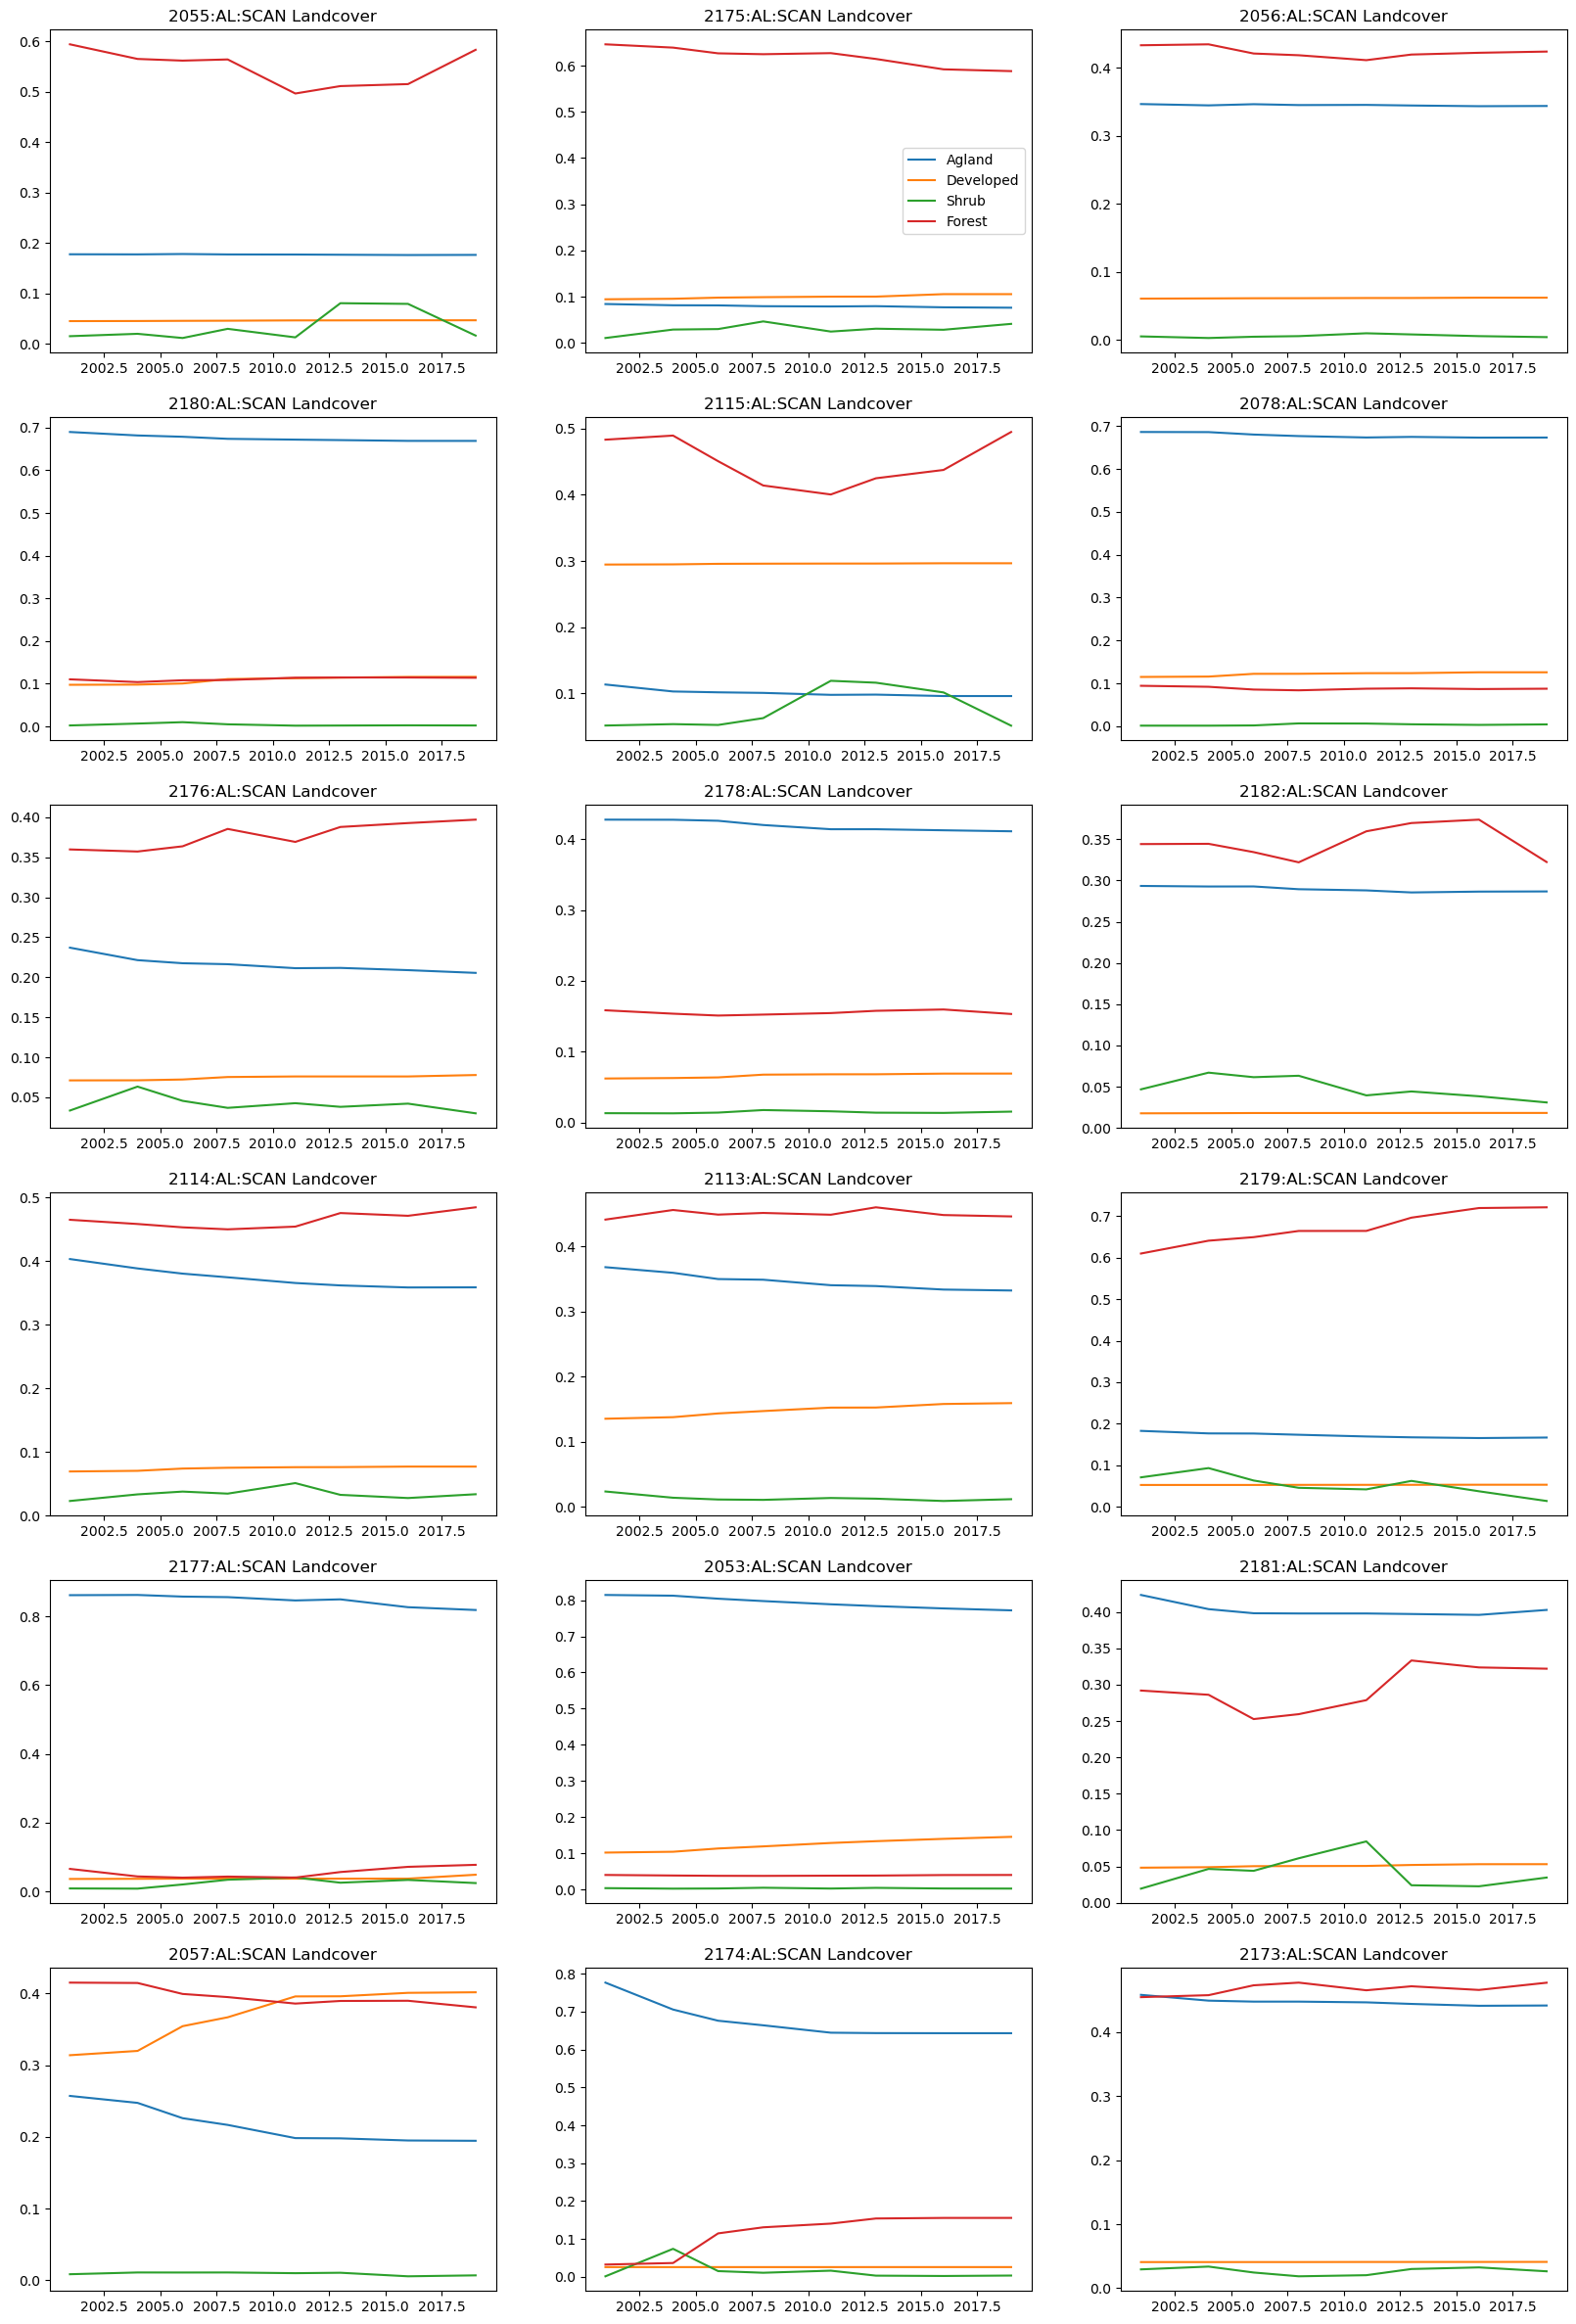

In [102]:
fig, ax = plt.subplots(6, 3, figsize=(20,30))
axs = ax.flatten()
count = 0

for i in LANDCOVER_READ.station.unique():
    stationFrame = LANDCOVER_READ[LANDCOVER_READ['station']==i]
    stationFrame.set_index('year', inplace=True)
    stationFrame = stationFrame.sort_index()
    axs[count].plot(stationFrame['Agland percent'], label='Agland')
    axs[count].plot(stationFrame['Developed percent'], label='Developed')
    axs[count].plot(stationFrame['Shrub percent'], label='Shrub')
    axs[count].plot(stationFrame['Forest percent'], label='Forest')
    axs[count].set_title(i + " Landcover")
    count+=1
    
fig.legend = axs[1].legend()
fig.legend

In [103]:
#do not correlate, now just test accuracy vs landtype
def plotLandCoverAccbyDepth(landtype, depth):
    """A function to return a plot of landcover percents and effect on accuracy of ALEXI prediction"""
    fig, ax = plt.subplots()
    stations = []
    landcoveravg = []
    accuracy = []

    for station in merged['station'].unique():
        stationFrame = merged[merged['station']==station]
        acc = stationFrame[depth].mean()
        landavg = stationFrame[landtype].mean()
        landcoveravg.append(landavg)
        stations.append(station)
        accuracy.append(acc)
        ax.scatter(landavg, acc, label=station)
    
    x = np.array(landcoveravg)
    y = np.array(accuracy)
    slope, intercept, r, p, se = stats.linregress(x, y)
    r2 = r**2
    ax.set_title("Average {} Yearly Accuracy vs {}".format(depth, landtype))
    textstr = "r2: {:.2f}\n p: {:.2f}".format(r2, p)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.set_xlabel("Mean " + landtype + " by station")
    ax.set_ylabel("Mean accuracy")
    return ax

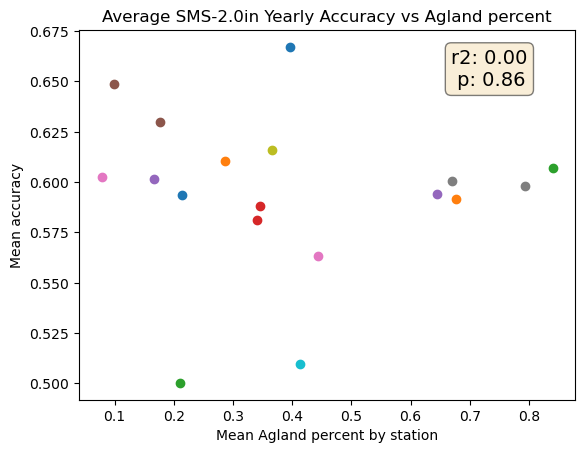

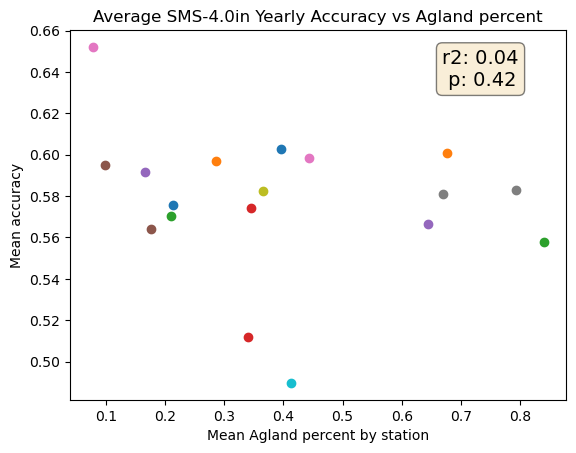

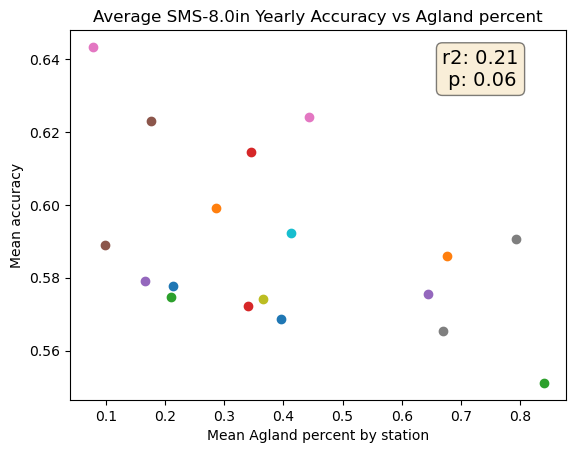

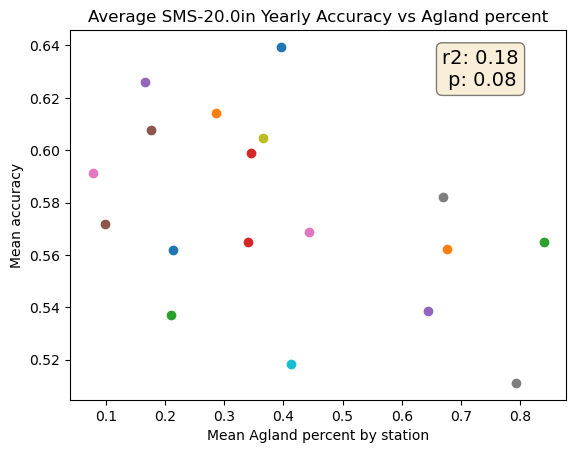

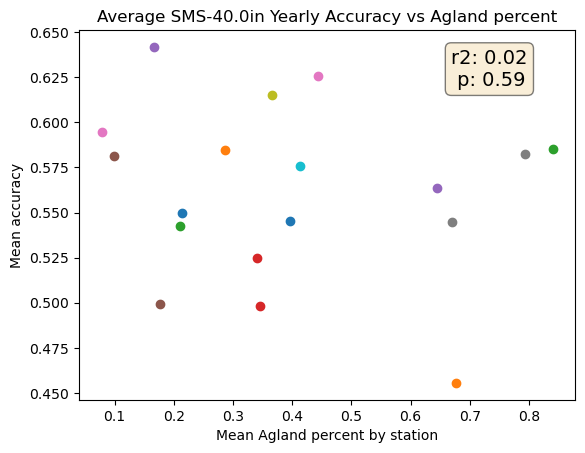

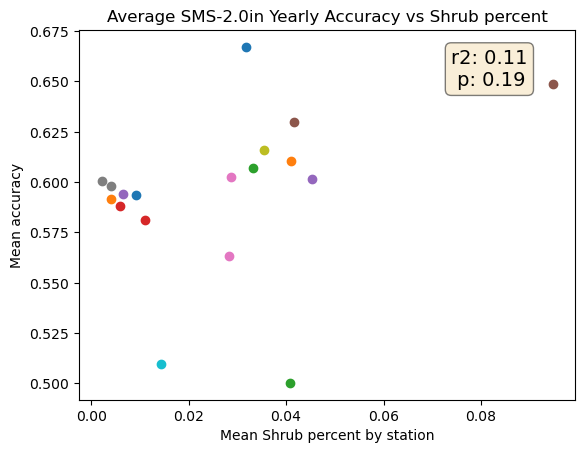

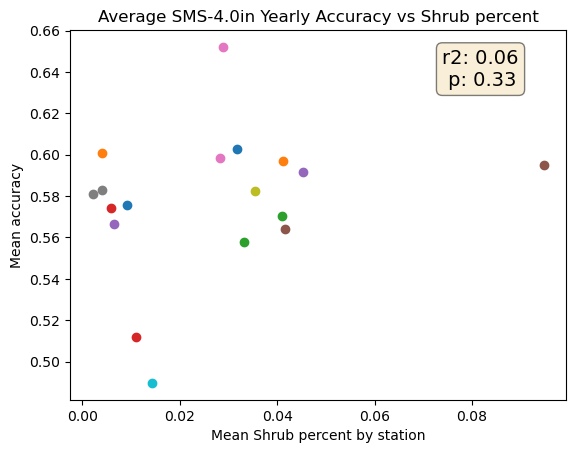

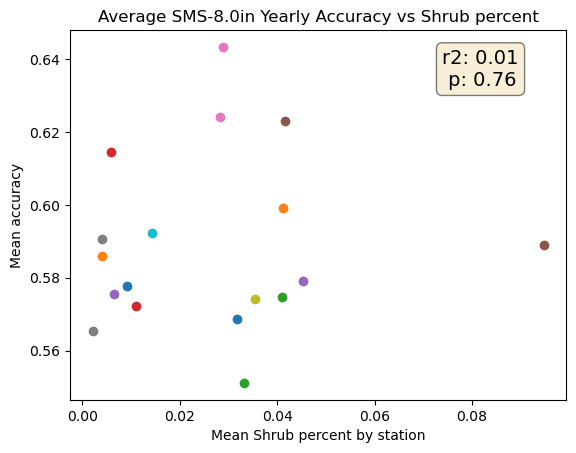

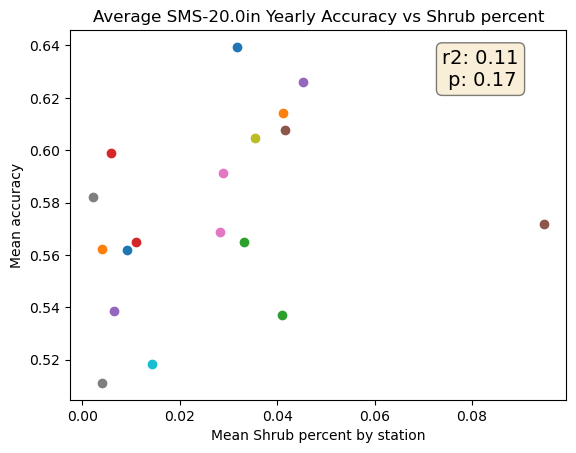

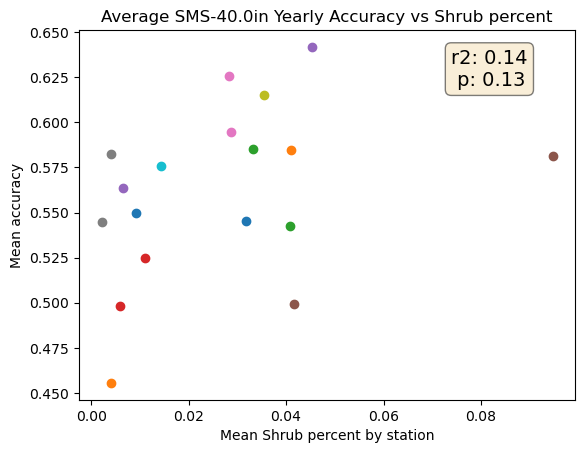

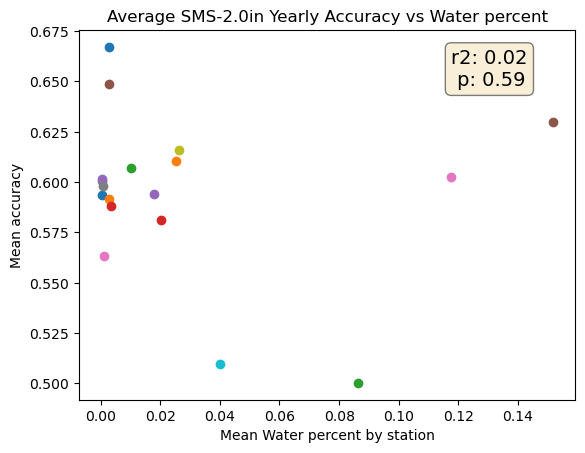

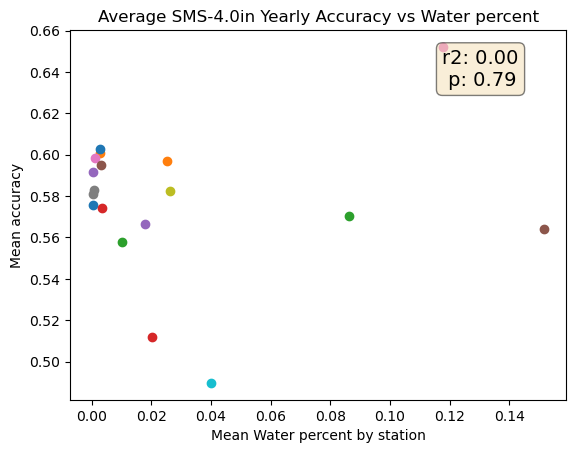

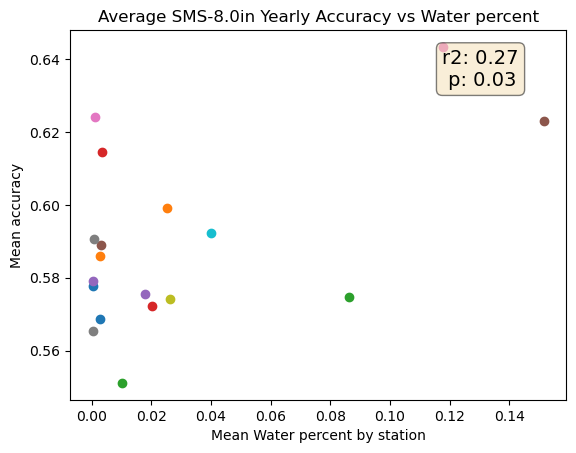

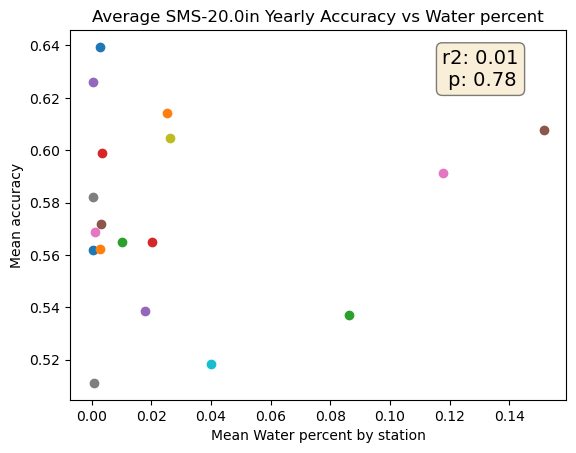

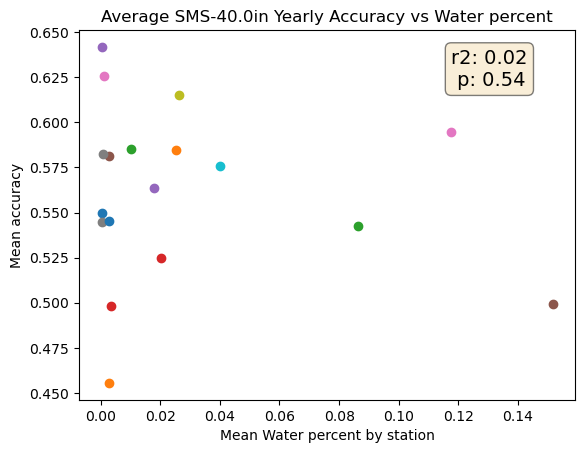

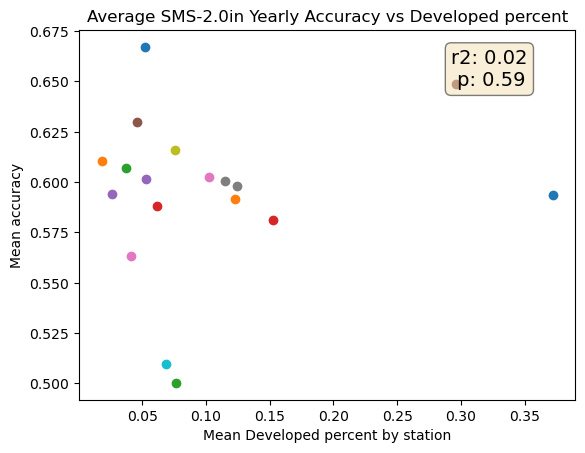

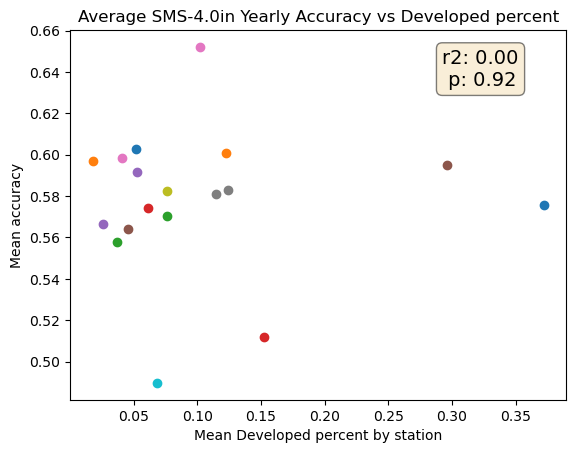

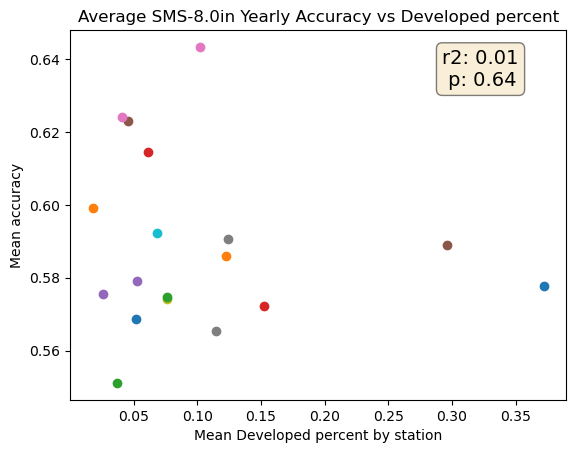

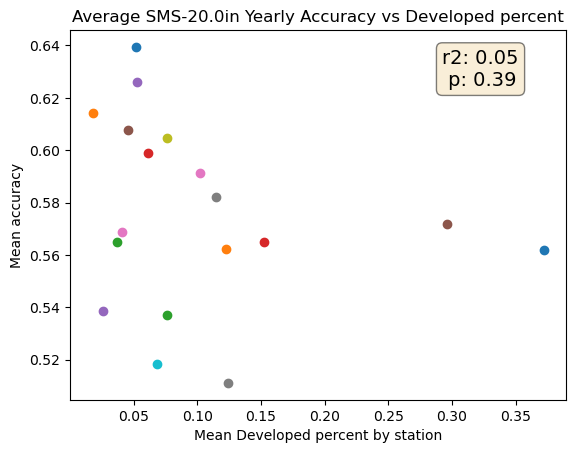

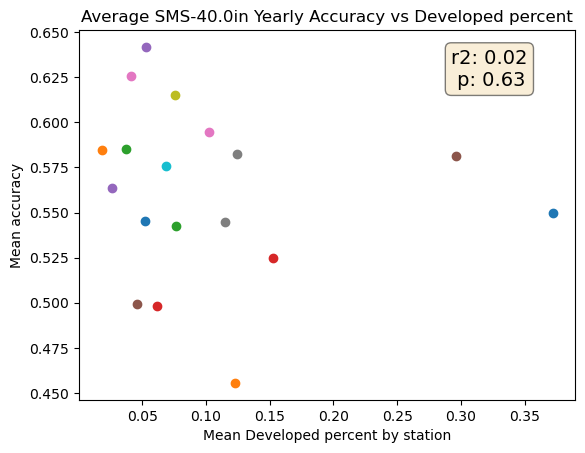

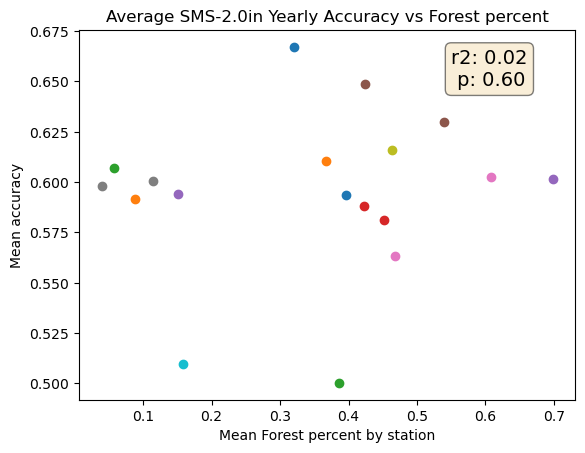

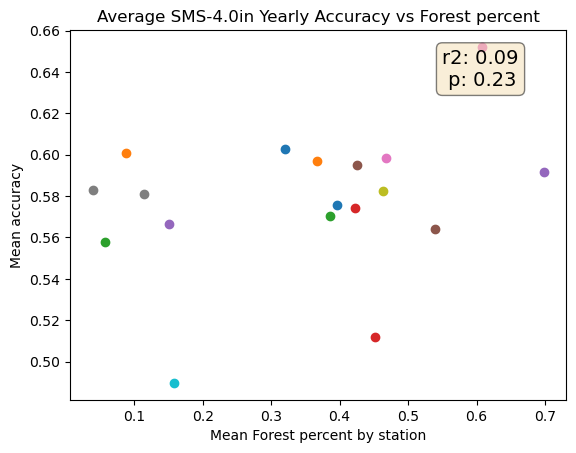

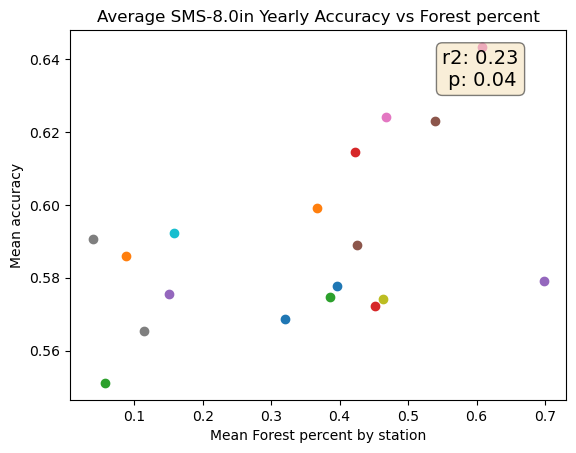

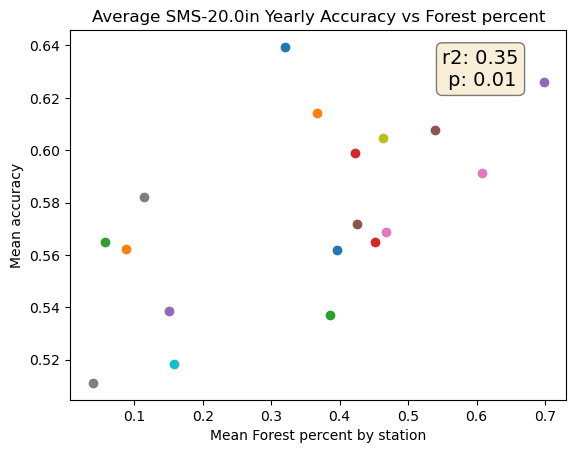

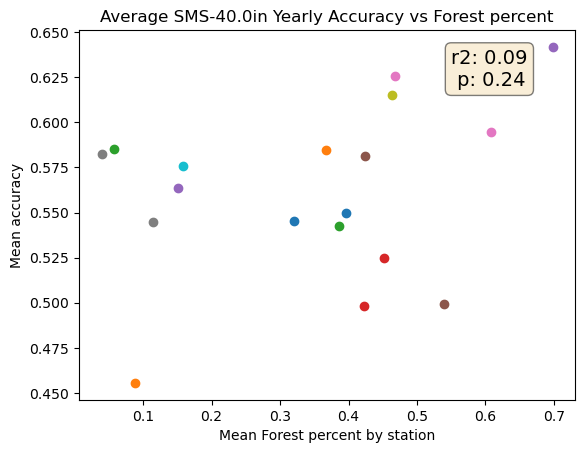

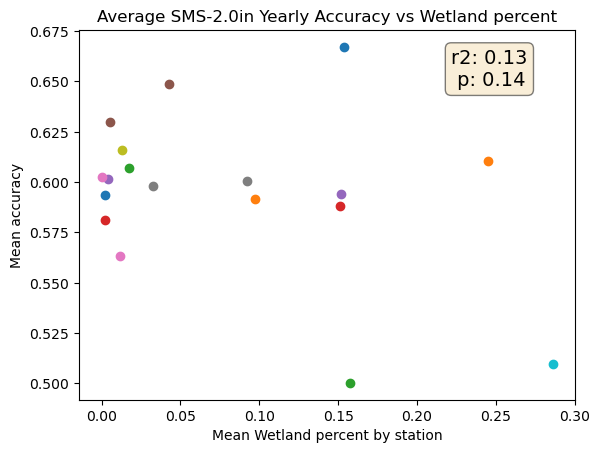

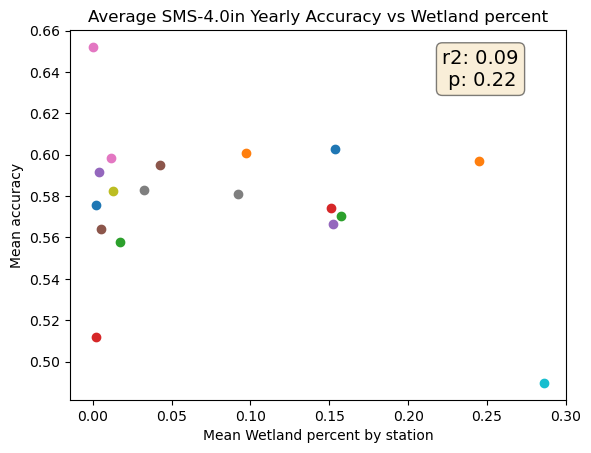

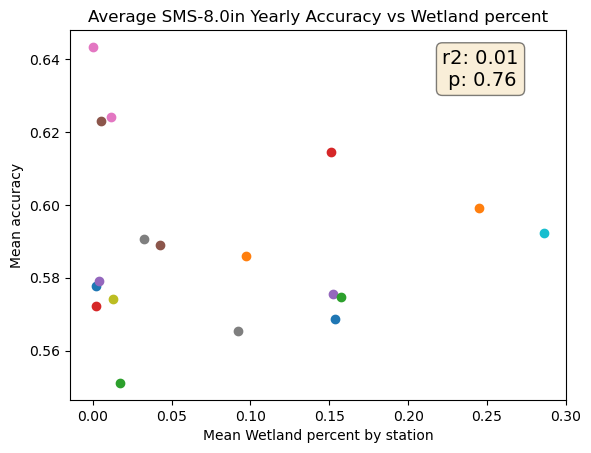

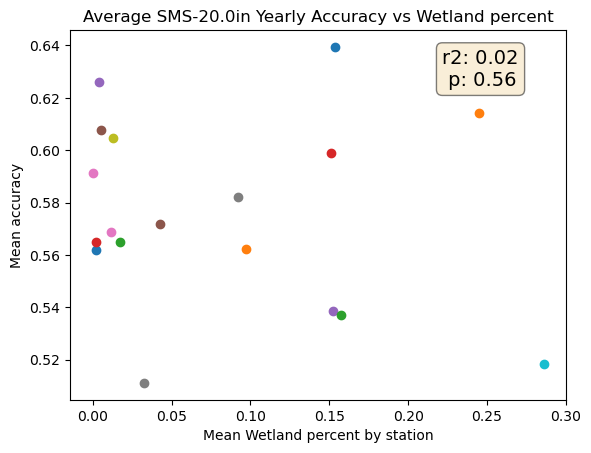

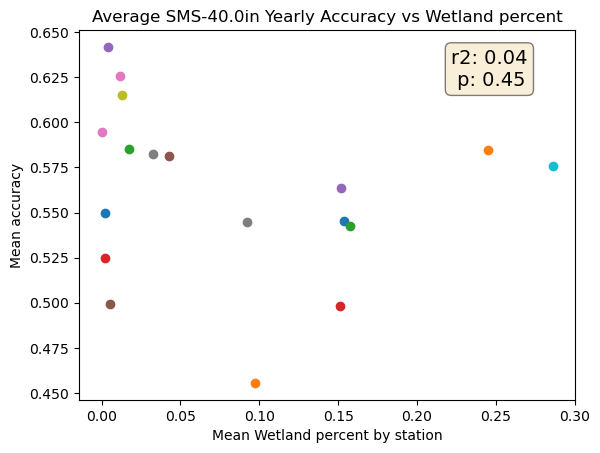

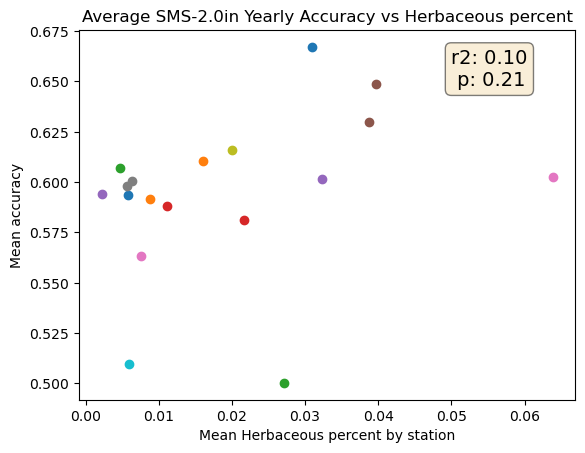

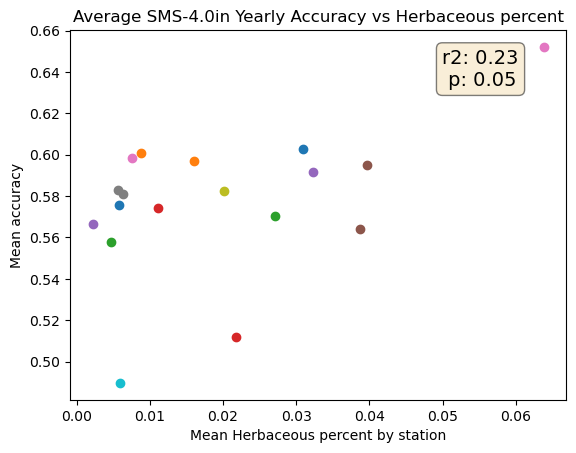

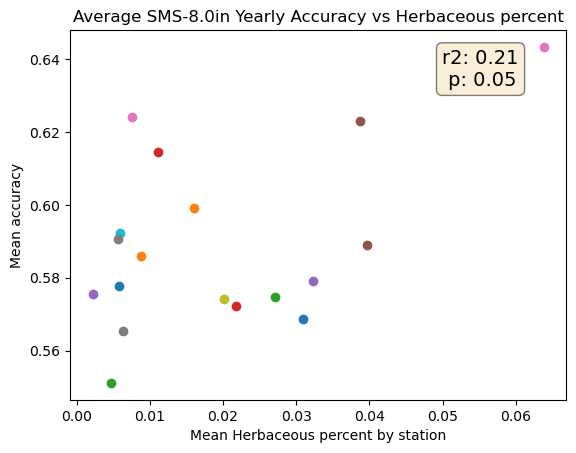

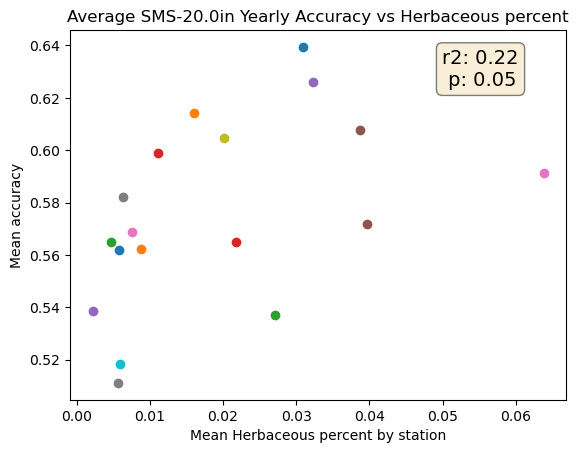

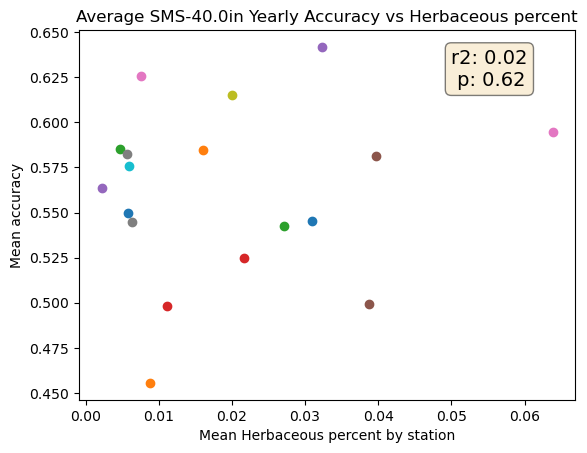

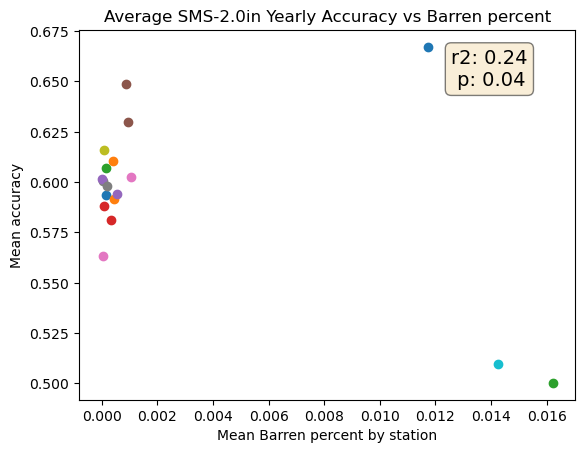

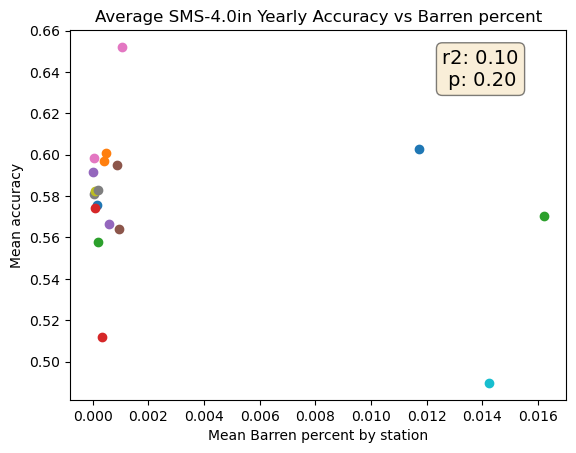

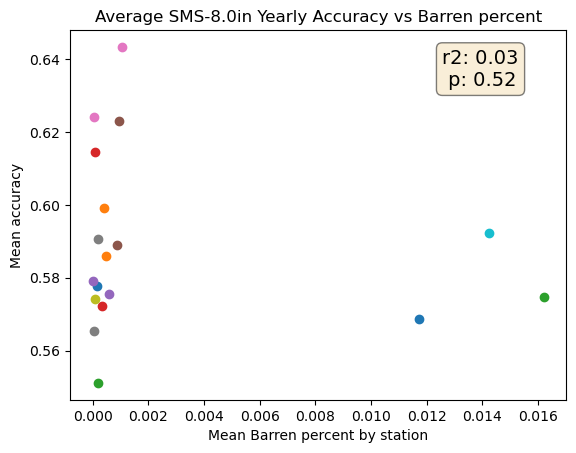

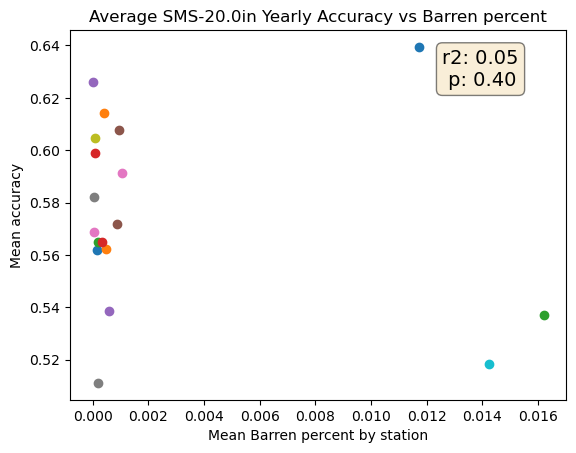

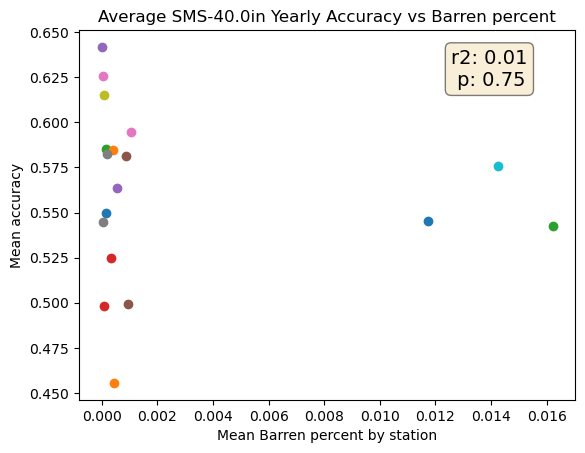

In [104]:
count = 0
for i in range(len(types)):
    for j in range(len(depths)):
        plotLandCoverAccbyDepth(types[i], depths[j])
        count+=1

In [105]:
#can we do this by month?
stations = []
landcoveravg = []
accuracy = []

for station in merged['station'].unique():
    stationFrame = merged[merged['station']==station]
    stationFrame.set_index('year', inplace=True)
    print(stationFrame)

      SMS-2.0in  SMS-4.0in  SMS-8.0in  SMS-20.0in  SMS-40.0in       station  \
year                                                                          
2002   0.333333   0.296296   0.296296    0.296296    0.333333  2057:AL:SCAN   
2003   0.488889   0.422222   0.444444    0.444444    0.444444  2057:AL:SCAN   
2004   0.545455   0.363636   0.500000    0.704545    0.636364  2057:AL:SCAN   
2005   0.659574   0.531915   0.553191    0.553191    0.553191  2057:AL:SCAN   
2006   0.580645   0.677419   0.677419    0.516129    0.451613  2057:AL:SCAN   
2007   0.736842   0.736842   0.763158    0.736842    0.684211  2057:AL:SCAN   
2008   0.612245   0.612245   0.612245    0.551020    0.612245  2057:AL:SCAN   
2009   0.609756   0.658537   0.585366    0.560976    0.463415  2057:AL:SCAN   
2010   0.681818   0.590909   0.590909    0.454545    0.454545  2057:AL:SCAN   
2011   0.741935   0.580645   0.677419    0.612903    0.483871  2057:AL:SCAN   
2012   0.666667   0.647059   0.686275    0.686275   

In [106]:
SOILS_READ = SOILS_READ.set_index('depth')

In [107]:
SOILS_READ[SOILS_READ.index=='HSMS-4.0in']['2057:AL:SCAN'].item()

'D'

In [108]:
LANDCOVER_READ

year       station  Agland percent  Water percent  Shrub percent  \
0    2001  2055:AL:SCAN        0.177688       0.151880       0.015075   
1    2001  2175:AL:SCAN        0.084138       0.118240       0.010565   
2    2001  2056:AL:SCAN        0.346842       0.002401       0.004942   
3    2001  2180:AL:SCAN        0.689843       0.000508       0.002098   
4    2001  2115:AL:SCAN        0.113554       0.003037       0.051703   
..    ...           ...             ...            ...            ...   
139  2019  2174:AL:SCAN        0.642954       0.016002       0.003653   
140  2019  2173:AL:SCAN        0.441240       0.001100       0.026320   
141  2019  2057:AL:SCAN        0.194507       0.000248       0.006733   
142  2019  2055:AL:SCAN        0.176452       0.151103       0.016311   
143  2019  2180:AL:SCAN        0.668934       0.000575       0.002030   

     Forest percent  Barren percent  Herbaceous percent  Wetland percent  \
0          0.594457        0.000282            0.010838         0.004766   
1          0.646152        0.001116            0.045364         0.000070   
2          0.433367        0.000035            0.000530         0.151375   
3          0.110164        0.000034            0.007850         0.092130   
4          0.482863        0.000966            0.010907         0.042453   
..              ...             ...                 ...              ...   
139        0.155738        0.000696            0.001948         0.153025   
140        0.476819        0.000035            0.001916         0.011564   
141        0.380723        0.004004            0.009922         0.002126   
142        0.583548        0.002365            0.017546         0.006002   
143        0.113886        0.000034            0.007004         0.091589   

     Developed percent  
0             0.045013  
1             0.094355  
2             0.060508  
3             0.097374  
4             0.294516  
..                 ...  
139           0.025985  
140           0.041006  
141           0.401736  
142           0.046673  
143           0.115949  

[144 rows x 10 columns]

In [110]:
stations = []
months = []

#corrs 
twoincorrs = []
fourincorrs = []
eightincorrs = []
twentyincorrs = []
fortyincorrs = []

#soils 
twoinsoil = []
fourinsoil = []
eightinsoil = []
twentyinsoil = []
fortyinsoil = []

#mean landcovers for 20 years
agland = []
water = []
shrub = []
forest = []
barren = []
wetland=[]
herbaceous = []
developed = []

#lets do a corr and accuracy analysis by station, landcover and soils 
for s in SM_VS_ESI_ANOM_READ['station'].unique():
    stationFrame = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']==s]
    stationFrame.set_index('Date', inplace=True)
    stationFrame.index = pd.to_datetime(stationFrame.index)
    for m in stationFrame.index.month.unique():
        stations.append(s)
        months.append(m)
        monthFrame=stationFrame[stationFrame.index.month==m]
        
        corr2in = monthFrame.drop(columns=['station']).corr()['ESI']['2inANOM']
        print(corr2in)
        corr4in = monthFrame.drop(columns=['station']).corr()['ESI']['4inANOM']
        corr8in = monthFrame.drop(columns=['station']).corr()['ESI']['8inANOM']
        corr20in = monthFrame.drop(columns=['station']).corr()['ESI']['20inANOM']
        corr40in = monthFrame.drop(columns=['station']).corr()['ESI']['40inANOM']
        
        twoincorrs.append(corr2in)
        fourincorrs.append(corr4in)
        eightincorrs.append(corr8in)
        twentyincorrs.append(corr20in)
        fortyincorrs.append(corr40in)
        
        twoInSoilType = SOILS_READ[SOILS_READ.index=='HSMS-2.0in'][s].item()
        fourInSoilType = SOILS_READ[SOILS_READ.index=='HSMS-4.0in'][s].item()
        eightInSoilType=SOILS_READ[SOILS_READ.index=='HSMS-8.0in'][s].item()
        twentyInSoilType = SOILS_READ[SOILS_READ.index=='HSMS-20.0in'][s].item()
        fortyInSoiType=SOILS_READ[SOILS_READ.index=='HSMS-40.0in'][s].item()
        
        twoinsoil.append(twoInSoilType)
        fourinsoil.append(fourInSoilType)
        eightinsoil.append(eightInSoilType)
        twentyinsoil.append(twentyInSoilType)
        fortyinsoil.append(fortyInSoiType)
        
        landcover = LANDCOVER_READ[LANDCOVER_READ['station']==s]
        meanAgland = landcover['Agland percent'].mean()
        meanWater = landcover['Water percent'].mean()
        meanShrub = landcover['Shrub percent'].mean()
        meanForest = landcover['Forest percent'].mean()
        meanBarren = landcover['Barren percent'].mean()
        meanHerbaceous = landcover['Herbaceous percent'].mean()
        meanWetland = landcover['Wetland percent'].mean()
        meanDeveloped = landcover['Developed percent'].mean()
        
        agland.append(meanAgland)
        water.append(meanWater)
        shrub.append(meanShrub)
        forest.append(meanForest)
        barren.append(meanBarren)
        herbaceous.append(meanHerbaceous)
        wetland.append(meanWetland)
        developed.append(meanDeveloped)
        
analysisdf = pd.DataFrame()
analysisdf['station']=stations
analysisdf['month']=months
analysisdf['2inCorr']=twoincorrs
analysisdf['4inCorr']=fourincorrs
analysisdf['8inCorr']=eightincorrs
analysisdf['20inCorr']=twentyincorrs
analysisdf['40inCorr']=fortyincorrs

analysisdf['2inSoil']=twoinsoil
analysisdf['4inSoil']=fourinsoil
analysisdf['8inSoil']=eightinsoil
analysisdf['20inSoil']=twentyinsoil
analysisdf['40inSoil']=fortyinsoil

analysisdf['mean20yrAgland']=agland
analysisdf['mean20yrWater']=water
analysisdf['mean20yrShrub']=shrub
analysisdf['mean20yrForest']=forest
analysisdf['mean20yrBarren']=barren
analysisdf['mean20yrHerbaceous']=herbaceous
analysisdf['mean20yrWetland']=wetland
analysisdf['mean20yrDeveloped']=developed


0.24293223233174913
0.22911226418774422
0.34690400813854766
0.23707343515287704
0.24937738635604179
0.5533860801193988
0.470065524865085
0.4141407298322597
0.2036423373183529
0.1142679217557623
-0.06317949513997152
0.07130769521145168
0.1265083406611841
0.274927550738583
0.6467377551247921
0.3233886191637442
0.22138931439950657
0.11325308381003514
0.24192081101246493
0.13266683553615735
0.3398960872785554
0.20795188418994112
0.15061209744459866
0.5245983874782899
0.3242372018425124
0.48103807039017865
0.3669163029662689
-0.08315359708206521
0.027198869277471834
0.448287271293748
0.3898520273910234
0.6359036901398057
0.35613144397255747
0.48822932201387026
-0.1338122498027874
-0.045239730862694345
0.15463178416953438
0.359453792574842
0.29284908672376375
0.4263901718336913
0.3176012560992206
0.4199208185625378
0.5887081054585249
0.11682413566255952
0.24326338948926446
0.0733452291325916
0.23759136322135133
0.3330985471765096
0.374217650847984
0.06651104243745454
-0.019219843262773945
-0

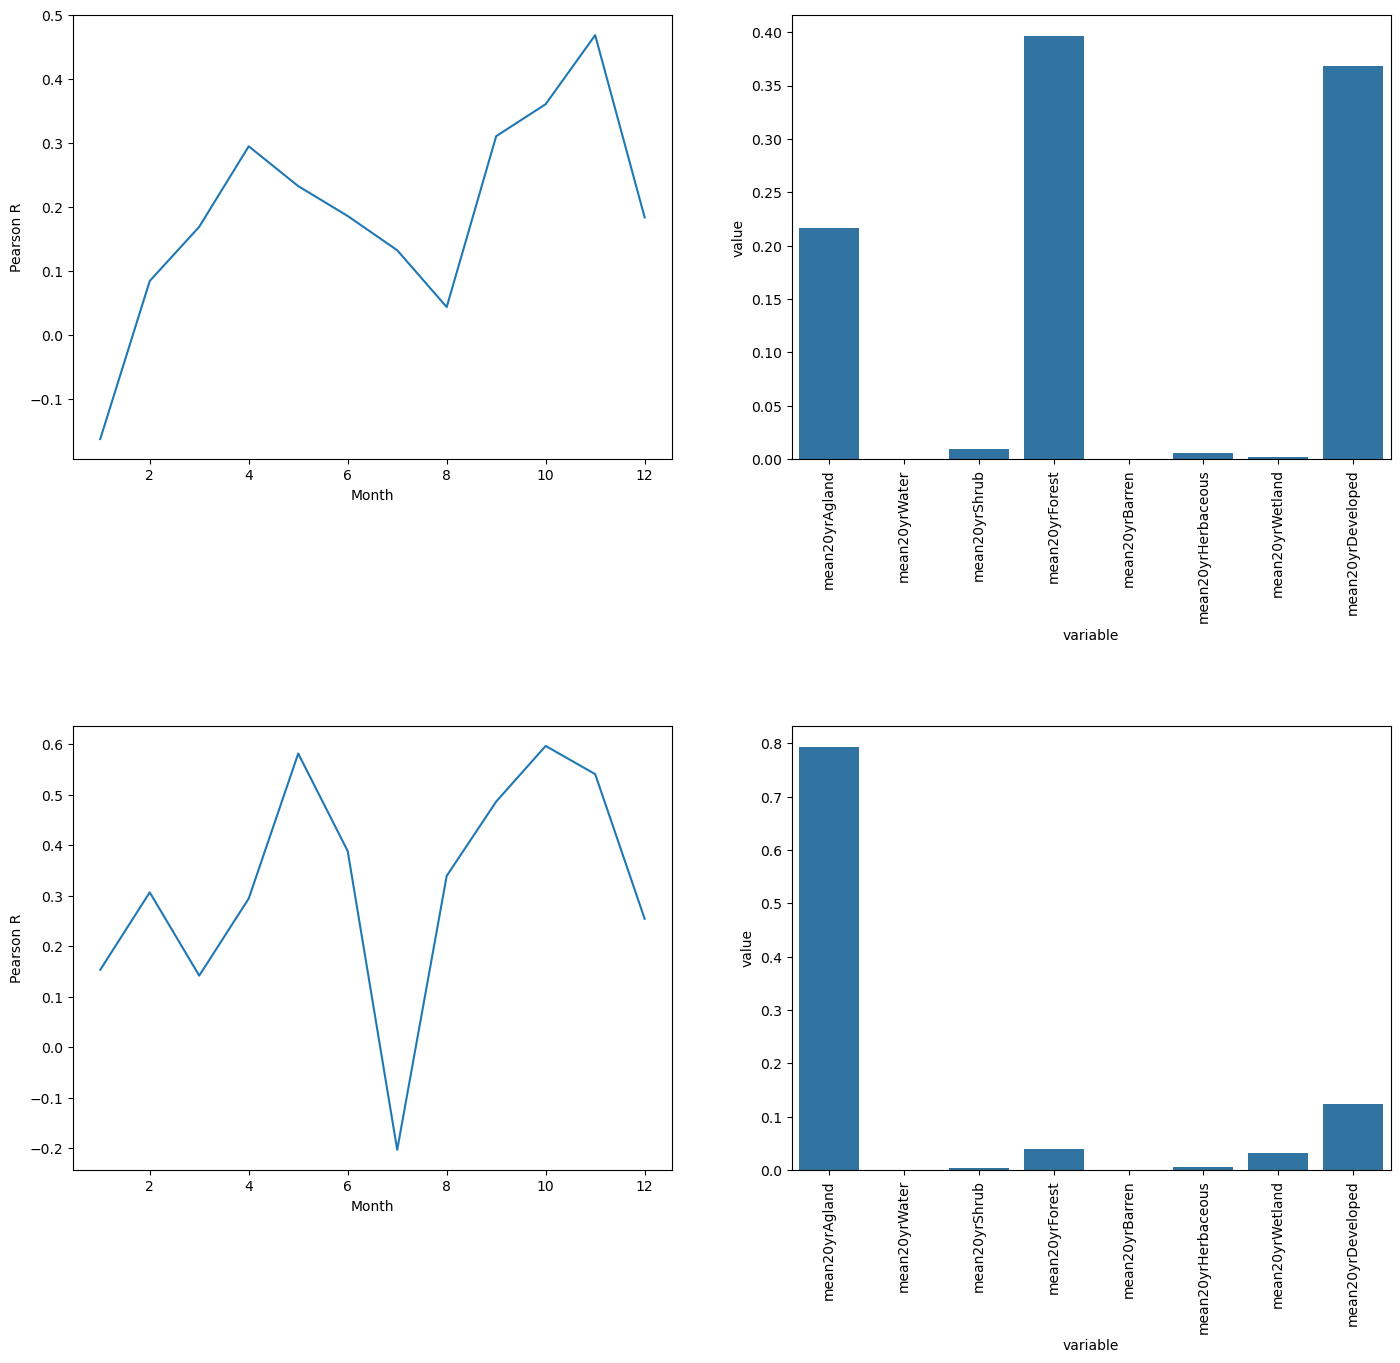

In [111]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,15))
axes=ax.flatten()

testFrame1 = analysisdf[analysisdf['station']=='2057:AL:SCAN']
testFrame1=testFrame1.set_index('month')
testFrame1.sort_index(inplace=True)
testFrame1

testFrame2 = analysisdf[analysisdf['station']=='2053:AL:SCAN']
testFrame2=testFrame2.set_index('month')
testFrame2.sort_index(inplace=True)
testFrame2


axes[0].plot(testFrame1['4inCorr'])
toBar = testFrame1[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
g = sns.barplot(x='variable', y='value', ax=axes[1], data=toBar)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Pearson R')
axes[1].tick_params(axis='x', rotation=90)

axes[2].plot(testFrame2['4inCorr'])
toBar2 = testFrame2[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
g = sns.barplot(x='variable', y='value', ax=axes[3], data=toBar2)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Pearson R')
axes[3].tick_params(axis='x', rotation=90)

fig.subplots_adjust(hspace=0.6)

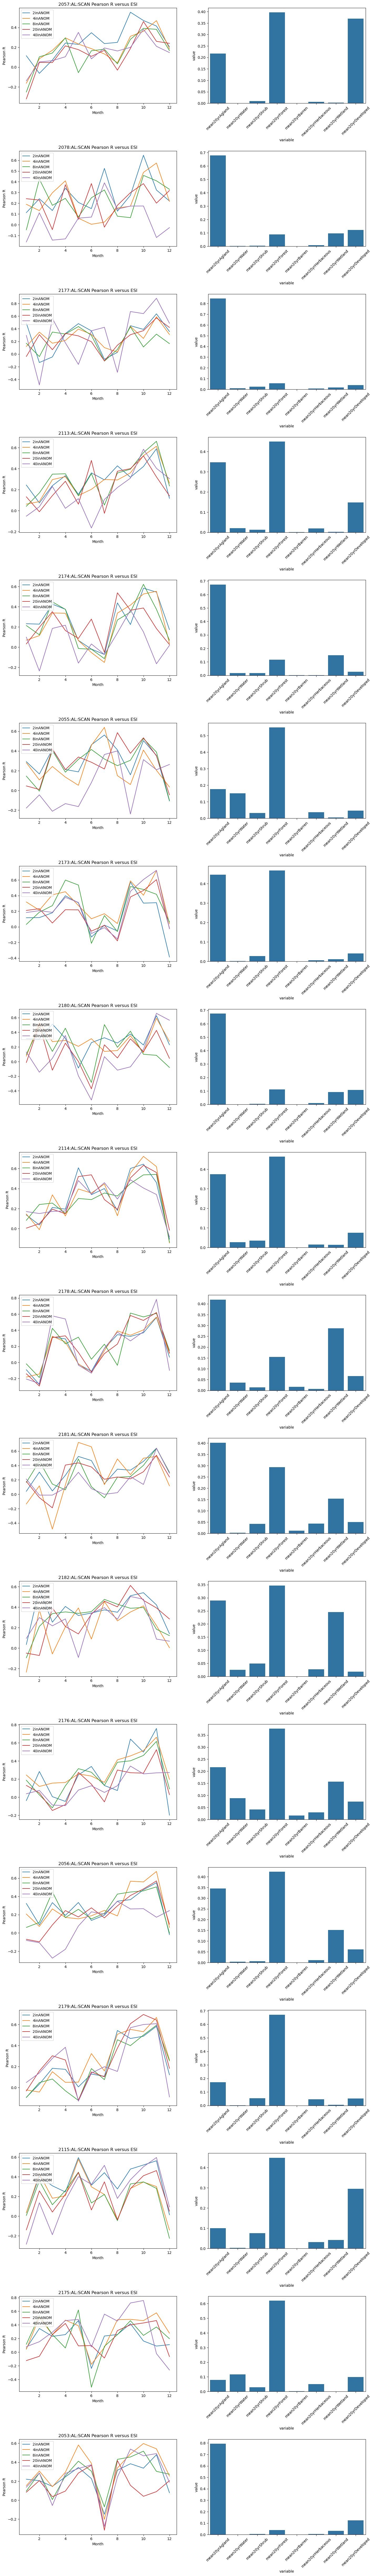

In [112]:
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)


In [ ]:
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
color_dic = {'A':'red', 'B':'orange', 'C':'yellow', 'D':'green'}
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label="2in"+ " " + testFrame['2inSoil'].unique().item(), color=color_dic.get(testFrame['2inSoil'].unique().item()))
    axes[count].plot(testFrame['4inCorr'], label="4in"+ " " + testFrame['4inSoil'].unique().item(), color=color_dic.get(testFrame['4inSoil'].unique().item()))
    axes[count].plot(testFrame['8inCorr'], label="8in"+ " " + testFrame['8inSoil'].unique().item(), color=color_dic.get(testFrame['8inSoil'].unique().item()))
    axes[count].plot(testFrame['20inCorr'], label="20in" + " " + testFrame['20inSoil'].unique().item(), color=color_dic.get(testFrame['20inSoil'].unique().item()))
    axes[count].plot(testFrame['40inCorr'], label="40in"+ " " + str(testFrame['40inSoil'].unique().item()), color=color_dic.get(testFrame['40inSoil'].unique().item()))
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R with ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
analysisdf = analysisdf.sort_values('mean20yrAgland')

In [ ]:
#sorted by agland
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)


In [ ]:
analysisdf = analysisdf.sort_values('mean20yrForest')

In [ ]:
#sorted by forest
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)


In [ ]:
#an agland to forest land ratio
analysisdf['agtoforest'] = abs(analysisdf['mean20yrAgland']-analysisdf['mean20yrForest'])

In [ ]:
analysisdf['agtoforest']

In [ ]:
analysisdf = analysisdf.sort_values('agtoforest')

In [ ]:
#sorted by ag to forest ratio
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
analysisdf = analysisdf.sort_values('mean20yrShrub')

In [ ]:
#sorted by shrub
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
#sorted by developed 
analysisdf = analysisdf.sort_values('mean20yrDeveloped')

In [ ]:
s2053=analysisdf[analysisdf['station']=='2053:AL:SCAN'][['month','2inCorr', '4inCorr', '8inCorr', '20inCorr','40inCorr']]
s2179=analysisdf[analysisdf['station']=='2179:AL:SCAN'][['month','2inCorr', '4inCorr', '8inCorr', '20inCorr','40inCorr']]

In [ ]:
s2053=s2053.rename(columns={'month':'Month', '2inCorr':'2inANOM', '4inCorr':'4inANOM', '8inCorr':'8inANOM', '20inCorr':'20inANOM', '40inCorr':'40inANOM'})

In [ ]:
s2053

In [ ]:
s2053[['2inANOM', '4inANOM', '8inANOM','20inANOM', '40inANOM']].describe()

In [ ]:
s2179=s2179.rename(columns={'month':'Month', '2inCorr':'2inANOM', '4inCorr':'4inANOM', '8inCorr':'8inANOM', '20inCorr':'20inANOM', '40inCorr':'40inANOM'})

In [ ]:
s2179[['2inANOM', '4inANOM', '8inANOM','20inANOM', '40inANOM']].describe()

In [ ]:
s2179

In [ ]:
#sorted by Developed
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
analysisdf['total']=analysisdf['mean20yrAgland']+analysisdf['mean20yrBarren']+analysisdf['mean20yrForest']+analysisdf['mean20yrHerbaceous']+analysisdf['mean20yrWetland']+analysisdf['mean20yrWater']+analysisdf['mean20yrShrub']+analysisdf['mean20yrDeveloped']

analysisdf['dominance']=((analysisdf['mean20yrAgland']*(analysisdf['mean20yrAgland']-1))+
                            (analysisdf['mean20yrBarren']*(analysisdf['mean20yrBarren']-1))+
                            (analysisdf['mean20yrForest']*(analysisdf['mean20yrForest']-1))+
                            (analysisdf['mean20yrHerbaceous']*(analysisdf['mean20yrHerbaceous']-1))+
                            (analysisdf['mean20yrWetland']*(analysisdf['mean20yrWetland']-1))+
                            (analysisdf['mean20yrWater']*(analysisdf['mean20yrWater']-1))+
                            (analysisdf['mean20yrShrub']*(analysisdf['mean20yrShrub']-1))+
                            (analysisdf['mean20yrDeveloped']*(analysisdf['mean20yrDeveloped']-1)))/(analysisdf['total']*(analysisdf['total']-1))

In [ ]:
analysisdf = analysisdf.sort_values(['dominance', 'mean20yrForest'])

In [ ]:
#sorted by Dominance
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
analysisdf['dominance']=analysisdf['mean20yrAgland']**2+analysisdf['mean20yrWater']**2+analysisdf['mean20yrShrub']**2+analysisdf['mean20yrForest']**2+analysisdf['mean20yrBarren']**2+analysisdf['mean20yrHerbaceous']**2+analysisdf['mean20yrWetland']**2+analysisdf['mean20yrDeveloped']**2

In [ ]:
analysisdf = analysisdf.sort_values(by =['dominance', 'mean20yrForest'], ascending=[False, False])
analysisdf 

In [ ]:
analysisdf = analysisdf.sort_values(by =['dominance', 'mean20yrAgland'], ascending=[False, False])
analysisdf 
#sorted by dominance
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(17,125))
axes=ax.flatten()
count = 0
for s in analysisdf['station'].unique():
    testFrame = analysisdf[analysisdf['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped', 'dominance']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1]
    axes[count+1].tick_params(axis='x', rotation=45)
    axes[count+1].set_ylim(0.0, 0.9)
    count+=2
fig.subplots_adjust(hspace=0.5)

In [ ]:
growing = analysisdf

In [ ]:
growing = analysisdf[(analysisdf['month']>=5)&(analysisdf['month']<=10)]

In [ ]:
growing

In [ ]:
growing.sort_values('dominance')

In [ ]:
monthcheck=growing[growing['month']==5]

In [ ]:
sns.regplot(x='dominance', y='4inCorr', data=monthcheck)

In [ ]:
growing = growing.sort_values('month')

In [ ]:
growing

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes=ax.flatten()
count=0
for m in growing['month'].unique():
    monthFrame=growing[growing['month']==m]
    p = sns.scatterplot(x='dominance', y='4inCorr', data=monthFrame, ax=axes[count], hue='4inSoil')
    axes[count].set_title(m)
    count+=1
    handles, labels = p.get_legend_handles_labels()
    p.legend(handles=handles[0:], labels=labels[0:])

In [ ]:
analysisdf = analysisdf.sort_values('month')

In [ ]:
values = analysisdf['4inSoil'].unique()
np.sort(values)

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(18, 25))
axes=ax.flatten()
count=0
for m in analysisdf['month'].unique():
    monthFrame=analysisdf[analysisdf['month']==m]
    hue_values = monthFrame['4inSoil'].unique()
    hue_sort = np.sort(hue_values)
    p = sns.scatterplot(x='dominance', y='4inCorr', data=monthFrame, ax=axes[count], hue='4inSoil', hue_order=hue_sort)
    axes[count].set_title("Month " + str(m) + " Landcover Dominance versus Four Inch Pearson R by Soil Type")
    axes[count].set_ylabel('Pearson R')
    count+=1
    handles, labels = p.get_legend_handles_labels()
    p.legend(handles=handles[0:], labels=labels[0:])

fig.subplots_adjust(hspace=0.5)

In [ ]:
dominance = []
avgCorrs = []
#what is the average dominance by soil type?
for n in analysisdf['dominance'].unique():
    numberFrame = analysisdf[analysisdf['dominance']==n]
    avgCorr = numberFrame['4inCorr'].mean()
    dominance.append(n)
    avgCorrs.append(avgCorr)
    
df = pd.DataFrame()
df['dominance']=dominance
df['4inCorr']=avgCorrs

In [ ]:
sns.scatterplot(x='dominance', y='4inCorr', data=df)

In [ ]:
store={}
count=0
for n in analysisdf['dominance'].unique():
    numberFrame = analysisdf[analysisdf['dominance']==n]
    barren = numberFrame['mean20yrBarren'].unique().item()
    wetland = numberFrame['mean20yrWetland'].unique().item()
    forest = numberFrame['mean20yrForest'].unique().item()
    agland = numberFrame['mean20yrAgland'].unique().item()
    shrub = numberFrame['mean20yrShrub'].unique().item()
    water = numberFrame['mean20yrWater'].unique().item()
    developed = numberFrame['mean20yrDeveloped'].unique().item()
    herb = numberFrame['mean20yrHerbaceous'].unique().item()
    
    compareDic = {'barren':barren, 'wetland':wetland, 'forest':forest, 
                  'agland':agland, 'shrub':shrub, 'water':water, 
                  'developed':developed, 'herb':herb}
    Keymax = max(compareDic, key= lambda x: compareDic[x])
    numberFrame['Dominant Land Cover'] = Keymax
    count+=1
    store[count]=numberFrame
df = pd.concat(store, axis=0, ignore_index=True)

In [ ]:
df = df.sort_values(['Dominant Land Cover', 'dominance', 'agtoforest'], ascending=[True, True, False])
#asecnding dlc = ag -> forest 
#ascending dom = least diverse -> most diverse
#Descending agtoforest = Biggest difference -> Smallest difference 

In [ ]:
#sorted by Dominant Land Cover (ag or forest) and Dominance 
fig, ax = plt.subplots(nrows=36, ncols=1, figsize=(8.5,250))
axes=ax.flatten()
count = 0
for s in df['station'].unique():
    testFrame = df[df['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count+1].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count+1].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count+1].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count+1].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count+1].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped', 'dominance']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count], data=toBar)
    axes[count+1].set_xlabel('Month', fontsize=20)
    axes[count+1].set_ylabel('Pearson R', fontsize=20)
    axes[count+1].set_title(s + " " + "Pearson R versus ESI", fontsize=20)
    axes[count+1].legend(loc='upper left')
    axes[count].tick_params(axis='x', rotation=45)
    axes[count].set_ylim(0.0, 0.9)
    axes[count].set_title(s+ ' ' +"Dominant Land Cover: " + testFrame['Dominant Land Cover'].unique().item().capitalize(), fontsize=16)
    axes[count].set(xlabel=None)
    axes[count].set_ylabel('Value', fontsize=20)
    count+=2
fig.subplots_adjust(hspace=0.5)
fig.savefig('corrbydepthandland.png')

In [ ]:
#sorted by Dominant Land Cover (ag or forest) and Dominance 
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(18,45))
axes=ax.flatten()
count = 0
test = df[df['Dominant Land Cover']=='agland']
for s in test['station'].unique():
    testFrame = test[test['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['2inCorr'], label='2inANOM')
    axes[count].plot(testFrame['4inCorr'], label='4inANOM')
    axes[count].plot(testFrame['8inCorr'], label='8inANOM')
    axes[count].plot(testFrame['20inCorr'], label='20inANOM')
    axes[count].plot(testFrame['40inCorr'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped', 'dominance']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Pearson R')
    axes[count].set_title(s + " " + "Pearson R versus ESI")
    axes[count].legend(loc='upper left')
    axes[count+1].tick_params(axis='x', rotation=55)
    axes[count+1].set_ylim(0.0, 0.9)
    axes[count+1].set_title("Dominant Land Cover: " + testFrame['Dominant Land Cover'].unique().item().capitalize())
    axes[count+1].set(xlabel=None)
    count+=2
fig.subplots_adjust(hspace=0.5)
fig.savefig('aglandcorrvsdominance.pdf')

In [ ]:
analysisdf['agtoforest']

In [ ]:
types = []
months = []
corrs = []
for t in df['Dominant Land Cover'].unique():
    typeFrame = df[df['Dominant Land Cover']==t]
    for m in typeFrame['month'].unique():
        monthFrame=typeFrame[typeFrame['month']==m]
        avgCorr = monthFrame['4inCorr'].mean()
        types.append(t)
        months.append(m)
        corrs.append(avgCorr)
        
typeCorrs = pd.DataFrame()
typeCorrs['types']=types
typeCorrs['month']=months
typeCorrs['avg4inCorr']=corrs

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
g = sns.lineplot(x='month', y='avg4inCorr', data=typeCorrs, hue='types', ax=ax)
ax.set_ylabel('Average Pearson R', fontsize=19)
ax.set_xlabel('Month', fontsize=19)
ax.set_title('Average 4inANOM Pearson R versus Land Cover Type', fontsize=19)
ax.xaxis.set_tick_params(labelsize=15)
ax.legend()
fig.subplots_adjust(hspace=0.5)

In [ ]:
test = df[['month','2inCorr','4inCorr','8inCorr', '20inCorr', '40inCorr', 'Dominant Land Cover']]

In [ ]:
sns.boxplot(x='month', y='2inCorr', hue='Dominant Land Cover', data=test)

In [ ]:
sns.boxplot(x='month', y='4inCorr', hue='Dominant Land Cover', data=test)

In [ ]:
sns.boxplot(x='month', y='8inCorr', hue='Dominant Land Cover', data=test)

In [ ]:
sns.boxplot(x='month', y='20inCorr', hue='Dominant Land Cover', data=test)

In [ ]:
sns.boxplot(x='month', y='40inCorr', hue='Dominant Land Cover', data=test)

In [ ]:
sns.boxplot(x='month', y='4inCorr', hue='4inSoil', data=df)

In [ ]:
new = df.dropna(subset=['40inSoil'])

In [ ]:
new['40inSoil']

In [ ]:
#lets make a plot of each depth and hue by landcover, and on the other side do the soil cover
fig, ax = plt.subplots(figsize=(8.5, 50), nrows=10, ncols=1, constrained_layout=True)
axes = ax.flatten()

soil_dic = {'A':'red', 'B':'blue', 'C':'orange', 'D':'green'}
count = 0
for i in ['2in', '4in', '8in', '20in', '40in']:
    soil_var = i+"Soil"
    corr_var = i+"Corr"
    hue_order = df[soil_var].unique()
    sortSoil = list(np.sort(np.array([str(i) for i in hue_order])))
    new = df.dropna(subset=['40inSoil'])
    if 'nan' in sortSoil: sortSoil.remove('nan')
    p1 = sns.boxplot(x='month', y=corr_var, hue=soil_var, ax=axes[count], hue_order=sortSoil, data=new, palette=soil_dic)
    p2 = sns.boxplot(x='month', y=corr_var, hue='Dominant Land Cover', ax=axes[count+1], data=new)
    axes[count].set_xlabel('Month', fontsize=20)
    axes[count+1].set_xlabel('Month', fontsize=20)
    axes[count].set_title(i+"ANOM")
    axes[count].set_ylabel("Pearson R", fontsize=20)
    axes[count+1].set_ylabel("Pearson R", fontsize=20)
    
    leg1 = axes[count].get_legend()
    leg2 = axes[count+1].get_legend()
    
    axes[count].xaxis.set_tick_params(labelsize=15)
    axes[count].yaxis.set_tick_params(labelsize=15)
    axes[count+1].xaxis.set_tick_params(labelsize=15)
    axes[count+1].yaxis.set_tick_params(labelsize=15)
    
    axes[count].set_ylim(-0.4, 0.9)
    axes[count+1].set_ylim(-0.4, 0.9)
    count+=2
    
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Variability of Station Correlations by Landcover, Soil Type and Depth', fontsize=35, y=0.9)
plt.savefig('landcover-soilcover.pdf')

In [ ]:
new.set_index('month', inplace=True)

In [ ]:
months = []
depths = []
soiltype = []
avg_corr = []
#first loop through each unique soil column and get that column
for c in ['2inSoil', '4inSoil', '8inSoil', '20inSoil', '40inSoil']:
    column = new[c]
    #loop through each unique column and get the unique soil type
    for s in column.unique():
        #here is just the dataframe where that soil type exists
        soilFrame = new[new[c]==s]
        #give me the name of the appropriate correlation column to avg
        correlation=c.split('S')[0]+'Corr'
        #loop through each month and grab the avg correlation by month
        for m in soilFrame[correlation].index.unique():
            check = soilFrame[soilFrame[correlation].index==m]
            months.append(m)
            soiltype.append(s)
            avg_corr.append(check[correlation].mean())
            depths.append(c.split('S')[0]+"ANOM")
            
soilCorr = pd.DataFrame()
soilCorr['depths']=depths
soilCorr['soilType']=soiltype
soilCorr['avgCorr']=avg_corr
soilCorr['Month']=months

In [ ]:
soilCorr.set_index('Month', inplace=True)

In [ ]:
sns.boxplot(x=soilCorr.index, y='avgCorr', hue='soilType', data=soilCorr)

In [ ]:
types = []
months = []
twoincorrs = []
fourincorrs = []
eightincorrs = []
twentyincorrs= []
fortyincorrs = []
for t in df['Dominant Land Cover'].unique():
    typeFrame = df[df['Dominant Land Cover']==t]
    for m in typeFrame['month'].unique():
        monthFrame=typeFrame[typeFrame['month']==m]
        avgCorr2in = monthFrame['2inCorr'].mean()
        avgCorr4in = monthFrame['4inCorr'].mean()
        avgCorr8in = monthFrame['8inCorr'].mean()
        avgCorr20in = monthFrame['20inCorr'].mean()
        avgCorr40in = monthFrame['40inCorr'].mean()
        types.append(t)
        months.append(m)
        twoincorrs.append(avgCorr2in)
        fourincorrs.append(avgCorr4in)
        eightincorrs.append(avgCorr8in)
        twentyincorrs.append(avgCorr20in)
        fortyincorrs.append(avgCorr40in)
        
typeCorrs = pd.DataFrame()
typeCorrs['types']=types
typeCorrs['month']=months
typeCorrs['avg2inCorr']=twoincorrs
typeCorrs['avg4inCorr']=fourincorrs
typeCorrs['avg8inCorr']=eightincorrs
typeCorrs['avg20inCorr']=twentyincorrs
typeCorrs['avg40inCorr']=fortyincorrs

In [ ]:
fig, ax = plt.subplots(figsize=(10,15), nrows=2, ncols=1)
axes=ax.flatten()

count=0
for i in typeCorrs['types'].unique():
    typeFrame = typeCorrs[typeCorrs['types']==i]
    typeFrame = typeFrame.set_index('month')
    axes[count].plot(typeFrame['avg2inCorr'], label='2inANOM')
    axes[count].plot(typeFrame['avg4inCorr'], label='4inANOM')
    axes[count].plot(typeFrame['avg8inCorr'], label='8inANOM')
    axes[count].plot(typeFrame['avg20inCorr'], label='20inANOM')
    axes[count].plot(typeFrame['avg40inCorr'], label='40inANOM')
    axes[count].set_xlabel('Month', fontsize=20)
    axes[count].set_ylabel('Average Pearson R', fontsize=20)
    axes[count].legend(fontsize='x-large')
    axes[count].xaxis.set_tick_params(labelsize=15)
    axes[count].yaxis.set_tick_params(labelsize=15)
    axes[count].set_title(i.capitalize() + " Correlation by Depth", fontsize=20)
    count+=1
fig.savefig('agland-vs-forest.pdf')

In [ ]:
dominant_land = []
stations = []

for s in df['station'].unique():
    print(s)
    stations.append(s)
    dominant_land.append(df[df['station']==s]['Dominant Land Cover'].unique().item())

lcdf = pd.DataFrame()
lcdf['dominant_land']=dominant_land
lcdf['station']=stations
lcdf

In [ ]:
number = []
stations=[]
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
month = [] 
for s in finalFrame['station'].unique():
    stationFrame=finalFrame[finalFrame['station']==s]
    for m in stationFrame.index.month.unique():
        stations.append(s)
        month.append(m)
        print(s, m)
        monthFrame = stationFrame[stationFrame.index.month==m]
        y_pred = monthFrame['ESI_sign']
        x_true2in = monthFrame['2inANOM_sign']
        x_true4in = monthFrame['4inANOM_sign']
        x_true8in = monthFrame['8inANOM_sign']
        x_true20in = monthFrame['20inANOM_sign']
        x_true40in = monthFrame['40inANOM_sign']
        TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
        FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
        EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
        TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
        FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
        TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
        FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
        EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
        TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
        FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
        TwoListAccuracy.append(TwoAccuracy)
        FourListAccuracy.append(FourAccuracy)
        EightListAccuracy.append(EightAccuracy)
        TwentyListAccuracy.append(TwentyAccuracy)
        FortyListAccuracy.append(FortyAccuracy)
        
stationAccuracy = pd.DataFrame()
stationAccuracy['SMS-2.0in'] = TwoListAccuracy
stationAccuracy['SMS-4.0in'] = FourListAccuracy
stationAccuracy['SMS-8.0in'] = EightListAccuracy
stationAccuracy['SMS-20.0in'] = TwentyListAccuracy
stationAccuracy['SMS-40.0in'] = FortyListAccuracy
stationAccuracy['month'] = month
stationAccuracy['station']=stations

In [ ]:
stationAccuracy

In [ ]:
lcdf

In [ ]:
stationAccuracy = stationAccuracy.merge(lcdf, on='station')

In [ ]:
stationAccuracy

In [ ]:
for s in stationAccuracy['station'].unique():
    print(s)

In [ ]:
stationAccuracy = stationAccuracy.set_index('month')

In [ ]:
types = []
months = []
twoinaccs = []
fourinaccs = []
eightinaccs = []
twentyinaccs= []
fortyinaccs = []
for t in stationAccuracy['dominant_land'].unique():
    typeFrame = stationAccuracy[stationAccuracy['dominant_land']==t]
    for m in typeFrame.index.unique():
        monthFrame=typeFrame[typeFrame.index==m]
        avgAcc2in = monthFrame['SMS-2.0in'].mean()
        avgAcc4in = monthFrame['SMS-4.0in'].mean()
        avgAcc8in = monthFrame['SMS-8.0in'].mean()
        avgAcc20in = monthFrame['SMS-20.0in'].mean()
        avgAcc40in = monthFrame['SMS-40.0in'].mean()
        types.append(t)
        months.append(m)
        twoinaccs.append(avgAcc2in)
        fourinaccs.append(avgAcc4in)
        eightinaccs.append(avgAcc8in)
        twentyinaccs.append(avgAcc20in)
        fortyinaccs.append(avgAcc40in)
        
typeCorrs = pd.DataFrame()
typeCorrs['types']=types
typeCorrs['month']=months
typeCorrs['avg2inAcc']=twoinaccs
typeCorrs['avg4inAcc']=fourinaccs
typeCorrs['avg8inAcc']=eightinaccs
typeCorrs['avg20inAcc']=twentyinaccs
typeCorrs['avg40inAcc']=fortyinaccs

In [ ]:
typeCorrs.set_index('month')

In [ ]:
fig, ax = plt.subplots(figsize=(8.5,15), nrows=2, ncols=1)
axes=ax.flatten()

count=0
for i in typeCorrs['types'].unique():
    typeFrame = typeCorrs[typeCorrs['types']==i]
    typeFrame=typeFrame.set_index('month').sort_index()
    axes[count].plot(typeFrame['avg2inAcc'], label='2inANOM')
    axes[count].plot(typeFrame['avg4inAcc'], label='4inANOM')
    axes[count].plot(typeFrame['avg8inAcc'], label='8inANOM')
    axes[count].plot(typeFrame['avg20inAcc'], label='20inANOM')
    axes[count].plot(typeFrame['avg40inAcc'], label='40inANOM')
    axes[count].set_xlabel('Month', fontsize=20)
    axes[count].set_ylabel('Average Accuracy', fontsize=20)
    axes[count].legend(fontsize='x-large')
    axes[count].xaxis.set_tick_params(labelsize=15)
    axes[count].yaxis.set_tick_params(labelsize=15)
    axes[count].set_title(i.capitalize() + " Accuracy by Depth", fontsize=20)
    axes[count].set_ylim(0.45, 0.75)
    count+=1

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
agland = typeCorrs[typeCorrs['types']=='agland']
forest = typeCorrs[typeCorrs['types']=='forest']
agland = agland.set_index('month').sort_index()
forest = forest.set_index('month').sort_index()
ax.plot(agland['avg4inAcc'], label='Agland')
ax.plot(forest['avg4inAcc'], label='Forest')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title("Average ESI Prediction Accuracy for 4inANOM Truth by Land Cover Type", fontsize=15)
ax.set_ylim(0.45, 0.75)
ax.legend()
ax.set_ylabel('Average Accuracy', fontsize=19)
ax.set_xlabel('Month', fontsize=19)

In [ ]:
for t in stationAccuracy['dominant_land'].unique():
    typeFrame = stationAccuracy[stationAccuracy['dominant_land']==t]
    for s in typeFrame['station'].unique():
        stationFrame=typeFrame[typeFrame['station']==s]
        print(stationFrame)

In [ ]:
stationAccuracy = stationAccuracy.reset_index()

In [ ]:
stationAccuracy = stationAccuracy.merge(analysisdf, on=['station', 'month'])

In [ ]:
stationAccuracy.columns

In [ ]:
stationAccuracy = stationAccuracy.sort_values(['dominant_land', 'dominance'], ascending=[True, False])

In [ ]:
stationAccuracy

In [ ]:
#sorted by Dominant Land Cover (ag or forest) and Dominance 
fig, ax = plt.subplots(nrows=36, ncols=1, figsize=(10,300))
axes=ax.flatten()
count = 0
for s in stationAccuracy['station'].unique():
    testFrame = stationAccuracy[stationAccuracy['station']==s]
    testFrame=testFrame.set_index('month')
    testFrame.sort_index(inplace=True)
    axes[count].plot(testFrame['SMS-2.0in'], label='2inANOM')
    axes[count].plot(testFrame['SMS-4.0in'], label='4inANOM')
    axes[count].plot(testFrame['SMS-8.0in'], label='8inANOM')
    axes[count].plot(testFrame['SMS-20.0in'], label='20inANOM')
    axes[count].plot(testFrame['SMS-40.0in'], label='40inANOM')
    toBar = testFrame[['mean20yrAgland', 'mean20yrWater', 'mean20yrShrub', 'mean20yrForest','mean20yrBarren', 'mean20yrHerbaceous', 'mean20yrWetland','mean20yrDeveloped', 'dominance']].melt()
    g = sns.barplot(x='variable', y='value', ax=axes[count+1], data=toBar)
    axes[count].set_xlabel('Month')
    axes[count].set_ylabel('Accuracy')
    axes[count].set_title(s + " " + " Accuracy")
    axes[count].legend(loc='upper left')
    axes[count+1].tick_params(axis='x', rotation=45)
    axes[count+1].set_ylim(0.0, 0.9)
    axes[count+1].set_title("Dominant Land Cover: " + testFrame['dominant_land'].unique().item().capitalize())
    count+=2 
fig.subplots_adjust(hspace=0.5)

In [ ]:
from datasets import SCAN_SIG_READ

In [ ]:
SCAN_SIG_READ.reset_index(inplace=True)

In [ ]:
sigs = SCAN_SIG_READ.drop('Unnamed: 0', axis=1)

In [ ]:
sigs.sort_index(inplace=True)

In [ ]:
from datasets import SCAN_META_READ

In [ ]:
sigs = sigs.merge(SCAN_META_READ, on='station')

In [ ]:
sigs.set_index('Month', inplace=True)

In [ ]:
sigs.sort_index(inplace=True)

In [ ]:
months = []
depths = []
counts = []
for d in sigs['depth'].unique():
    depthFrame=sigs[sigs['depth']==d]
    for m in depthFrame.index.unique():
        count = len(depthFrame[depthFrame.index == m])
        depths.append(d)
        months.append(m)
        counts.append(count)
countFrame=pd.DataFrame()
countFrame['month']=months
countFrame['depth']=depths
countFrame['count']=counts

In [ ]:
countFrame

In [ ]:
fig, ax = plt.subplots(figsize=(14, 16), nrows=5, ncols=1, sharex=True)
axes = ax.flatten()
count=0
for d in ['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in']:
    depthFrame = countFrame[countFrame['depth']==d]
    g = sns.barplot(x='month', y='count', ax=axes[count], data=depthFrame)
    axes[count].set_title(d)
    axes[count].set_ylim(0, 18)
    count+=1

fig.subplots_adjust(hspace=0.3)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 16), nrows=5, ncols=1, sharex=True)
axes = ax.flatten()
count=0
for d in ['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in']:
    depthFrame = sigs[sigs['depth']==d]
    g = sns.boxplot(x=depthFrame.index, y='correlation', ax=axes[count], data=depthFrame)
    axes[count].set_title(d)
    axes[count].set_ylabel('Pearson R')
    count+=1

fig.subplots_adjust(hspace=0.3)

In [ ]:
sigs.reset_index(inplace=True)

In [ ]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [ ]:
test = sigs[sigs['Month']==1]

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1

for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-4.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].scatter(lon, lat, marker='o', color='red')
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 4inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-2.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].scatter(lon, lat, marker='o', color='red')
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 2inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-8.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].scatter(lon, lat, marker='o', color='red')
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    month+=1
    count+=1
    
fig.suptitle('Significant (p<0.05) 8inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-20.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].scatter(lon, lat, marker='o', color='red')
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'color': 'black', 'weight': 'normal'}
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 20inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
stations = []
dom_cover = []
for i in df[['station', 'Dominant Land Cover']]['station'].unique():
    station = df[['station', 'Dominant Land Cover']][df['station']==i]
    stations.append(i)
    dom_cover.append(station['Dominant Land Cover'].unique().item())
domCover = pd.DataFrame()
domCover['Dominant_land']=dom_cover
domCover['station']=stations

In [ ]:
domCover

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-40.0in']
    if m == 3:
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    else: 
        for i, r in depthFrame.iterrows():
            lat = r['Latitude']
            lon = r['Longitude']
            axes[count].add_feature(cartopy.feature.STATES)
            axes[count].add_feature(cartopy.feature.LAND)
            axes[count].set_extent([-89, -84, 30, 36])
            axes[count].set_title(m, fontweight='bold')
            axes[count].scatter(lon, lat, marker='o', color='red')
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 40inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
sigs = sigs.merge(domCover, on='station')
sigs = sigs.sort_values('Month')
colors = {'agland':'red', 'forest':'green'}
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-2.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        land = r['Dominant_land_x']
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
        color = colors.get(land)
        axes[count].scatter(lon, lat, marker='o', color=colors.get(land), label=land)
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 2inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

from matplotlib.patches import Patch

handles = [
    Patch(facecolor="green", label="Forest"),
    Patch(facecolor="red", label="Agland")
]

fig.legend(handles=handles, loc='lower center')


In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
sigs = sigs.merge(domCover, on='station')
sigs = sigs.sort_values('Month')
colors = {'agland':'red', 'forest':'green'}
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-4.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        land = r['Dominant_land_x'].unique().item()
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
        color = colors.get(land)
        axes[count].scatter(lon, lat, marker='o', color=colors.get(land), label=land)
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 4inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

from matplotlib.patches import Patch

handles = [
    Patch(facecolor="green", label="Forest"),
    Patch(facecolor="red", label="Agland")
]

fig.legend(handles=handles, loc='lower center')


In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
sigs = sigs.merge(domCover, on='station')
sigs = sigs.sort_values('Month')
colors = {'agland':'red', 'forest':'green'}
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-8.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        land = r['Dominant_land_x'].unique().item()
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
        color = colors.get(land)
        axes[count].scatter(lon, lat, marker='o', color=colors.get(land), label=land)
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 8inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

from matplotlib.patches import Patch

handles = [
    Patch(facecolor="green", label="Forest"),
    Patch(facecolor="red", label="Agland")
]

fig.legend(handles=handles, loc='lower center')

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
sigs = sigs.merge(domCover, on='station')
sigs = sigs.sort_values('Month')
colors = {'agland':'red', 'forest':'green'}
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-20.0in']
    for i, r in depthFrame.iterrows():
        lat = r['Latitude']
        lon = r['Longitude']
        land = r['Dominant_land_x'].unique().item()
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
        color = colors.get(land)
        axes[count].scatter(lon, lat, marker='o', color=colors.get(land), label=land)
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 20inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

from matplotlib.patches import Patch

handles = [
    Patch(facecolor="green", label="Forest"),
    Patch(facecolor="red", label="Agland")
]

fig.legend(handles=handles, loc='lower center')

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
axes=ax.flatten()
count = 0
month=1
sigs = sigs.merge(domCover, on='station')
sigs = sigs.sort_values('Month')
colors = {'agland':'red', 'forest':'green'}
for m in sigs['Month'].unique():
    monthFrame=sigs[sigs['Month']==m]
    depthFrame=monthFrame[monthFrame['depth']=='SMS-40.0in']
    if m == 3:
        axes[count].add_feature(cartopy.feature.STATES)
        axes[count].add_feature(cartopy.feature.LAND)
        axes[count].set_extent([-89, -84, 30, 36])
        axes[count].set_title(m, fontweight='bold')
    else: 
        for i, r in depthFrame.iterrows():
            lat = r['Latitude']
            lon = r['Longitude']
            land = r['Dominant_land_x'].unique().item()
            axes[count].add_feature(cartopy.feature.STATES)
            axes[count].add_feature(cartopy.feature.LAND)
            axes[count].set_extent([-89, -84, 30, 36])
            axes[count].set_title(m, fontweight='bold')
            color = colors.get(land)
            axes[count].scatter(lon, lat, marker='o', color=colors.get(land), label=land)
    gl = axes[count].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    month+=1
    count+=1
    
fig.suptitle('Significant Stations (p<0.05) 40inANOM versus 1 Week ESI Pearson R by Month', fontsize=19)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

from matplotlib.patches import Patch

handles = [
    Patch(facecolor="green", label="Forest"),
    Patch(facecolor="red", label="Agland")
]

fig.legend(handles=handles, loc='lower center')

In [ ]:
analysisdf.columns

In [ ]:
stationAccuracy

In [ ]:
testFrame

In [ ]:
stationAccuracy.columns

In [ ]:
lands = []
stations = []
for i in stationAccuracy['station'].unique():
    station = stationAccuracy[stationAccuracy['station']==i]
    land = station['dominant_land'].unique().item()
    lands.append(land)
    stations.append(i)
landFrame = pd.DataFrame()
landFrame['dominant_land']=lands
landFrame['station']=stations

In [ ]:
#landFrame.to_csv('DominantLandByStation.csv')